In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [2]:
data_path = "../data/PARTS/"
output_path = '../data/FEAT/'

In [3]:
X = pd.read_csv('../data/Overview.csv')
X

subjectID    type  n_parts  total_samples  frame_time
0       01_1_Char00   norma      2.0        30060.0       0.008
1       03_1_Char00  ataxie      5.0        10482.0       0.008
2       04_1_Char00   norma      7.0        24964.0       0.008
3       06_1_Char00   norma      6.0        23941.0       0.008
4       07_1_Char00   norma      1.0        34820.0       0.008
5     740516_Char00   norma      6.0        13773.0       0.017
6     535525_Char00   norma      3.0        15432.0       0.017
7     736123_Char00  ataxie      3.0        15208.0       0.017
8     715211_Char00  ataxie      2.0        18705.0       0.017
9     766012_Char00  ataxie      1.0        19541.0       0.017
10    755730_Char00  ataxie      1.0        14727.0       0.017
11    920828_Char00   norma     11.0        10782.0       0.017
12    681001_Char00  ataxie      1.0         9805.0       0.017
13  25031996_Char00   norma      4.0        38878.0       0.008
14    615829_Char00  ataxie      1.0        27922.0       0.008
15  15051994_Char00   norma      8.0        22186.0       0.008
16      09_1_Char00  ataxie      1.0        26580.0       0.017

In [4]:
labels = ['Xposition', 'Yposition', 'Zposition', 'Yrotation', 'Xrotation', 'Zrotation']

In [5]:
text_file = open('../data/JointNames.txt', "r")
joint_names = text_file.read().split('\n')

In [6]:
def plot_ax(time,x,joint,dim,subplot_pos1,subplot_pos2):
        ax[subplot_pos1,subplot_pos2].plot(time,x[joint,:,dim])
        ax[subplot_pos1,subplot_pos2].set_xlabel('Time')
        ax[subplot_pos1,subplot_pos2].set_ylabel(labels[dim])
        #ax[subplot_pos1,subplot_pos2].set_title(joint_names[joint])

In [7]:
def step_frequency(peaks,Ts):
    freq = []
    
    for n in range(0,len(peaks)-2):
        #print(n)
        #print(1/((peaks[n+2]-peaks[n])*Ts))
        freq.append(1/((peaks[n+2]-peaks[n])*Ts))        
    return np.mean(freq)

In [8]:
parts = pd.DataFrame(columns=['subjectID','type','part','t_sampling','sample_len','time_len'])

01_1_Char00
1/2
1
2/2
30
03_1_Char00
1/5
0
2/5
2
3/5
0
4/5
2
5/5
1
04_1_Char00
1/7
0
2/7
2
3/7
2
4/7
2
5/7
0
6/7
2
7/7
8
06_1_Char00
1/6
0
2/6
0
3/6
0
4/6
10
5/6
6
6/6
0
07_1_Char00
1/1


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


38
740516_Char00
1/6
6
2/6
0
3/6
0
4/6
6
5/6
0
6/6
8
535525_Char00
1/3
16
2/3
6
3/3
3
736123_Char00
1/3
0
2/3
13
3/3
3
715211_Char00
1/2
20
2/2
0
766012_Char00
1/1
8
755730_Char00
1/1
14
920828_Char00
1/11
0
2/11
0
3/11
0
4/11
0
5/11
0
6/11
0
7/11
0
8/11
0
9/11
0
10/11
2
11/11
4
681001_Char00
1/1
5
25031996_Char00
1/4
0
2/4
0
3/4
20
4/4
10
615829_Char00
1/1
11
15051994_Char00
1/8
1
2/8
0
3/8
0
4/8
12
5/8
0
6/8
0
7/8
0
8/8
0
09_1_Char00
1/1
20


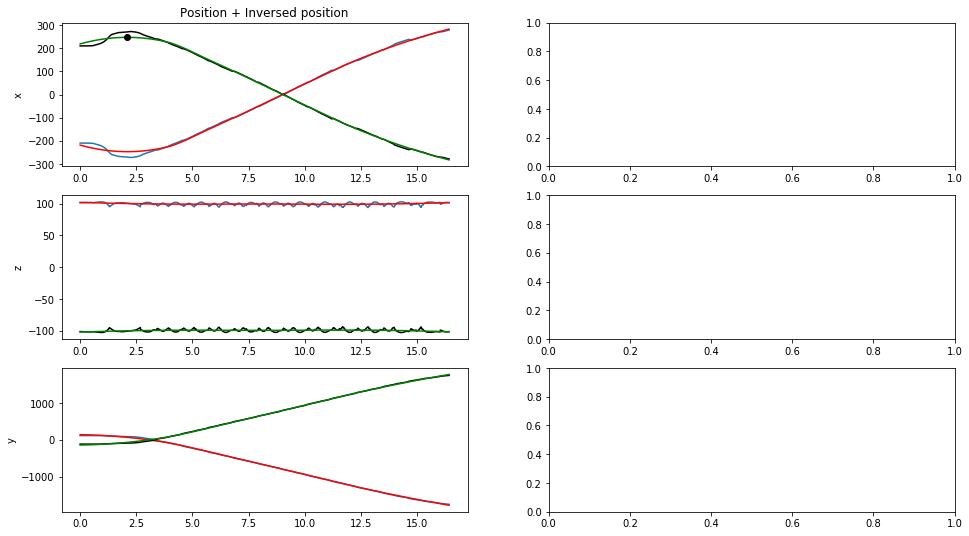

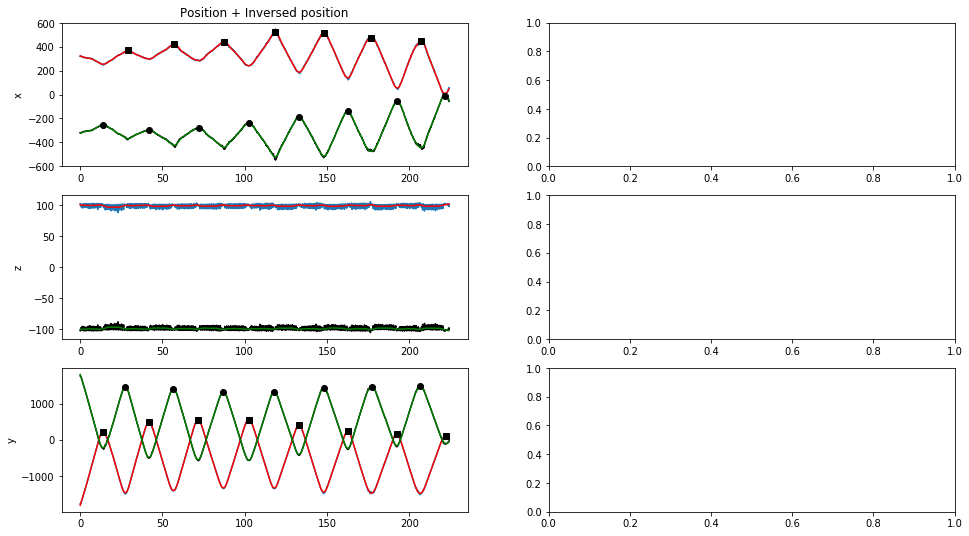

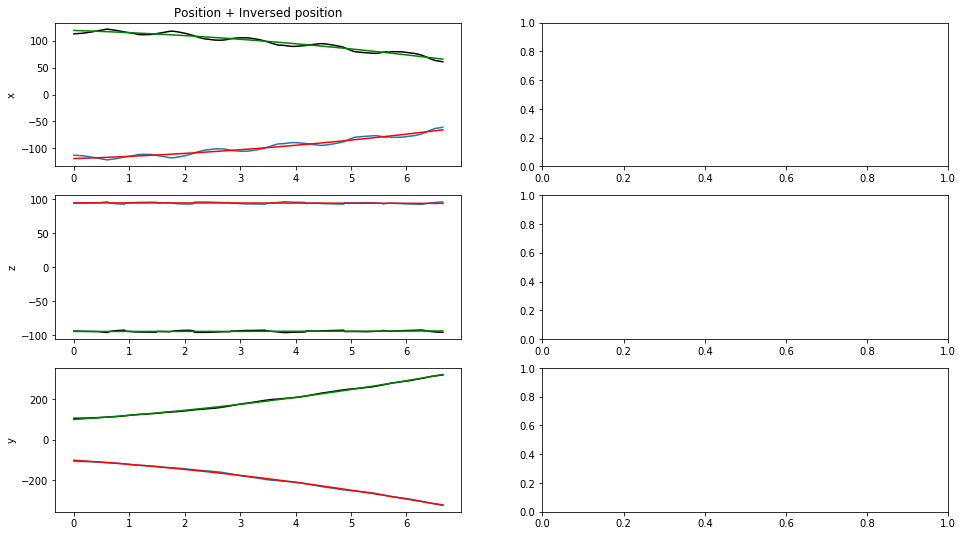

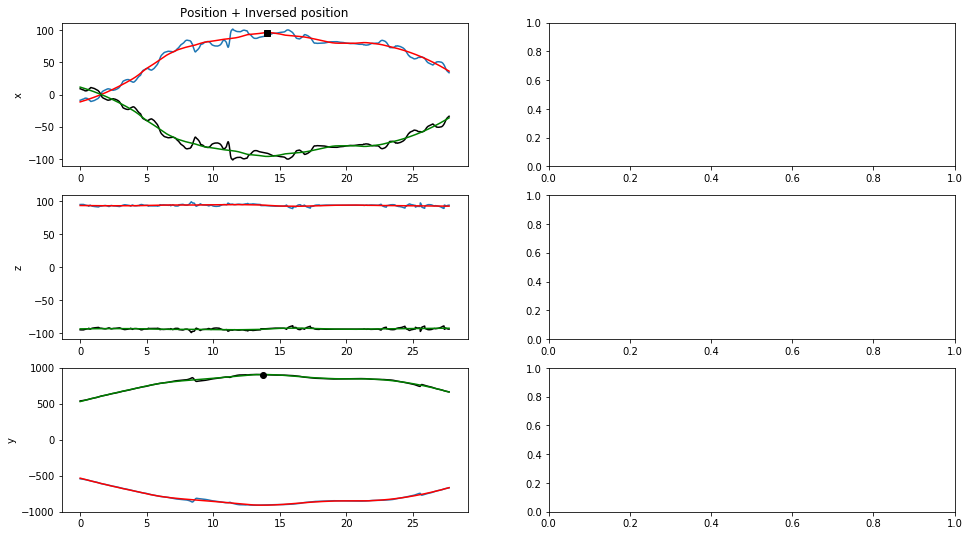

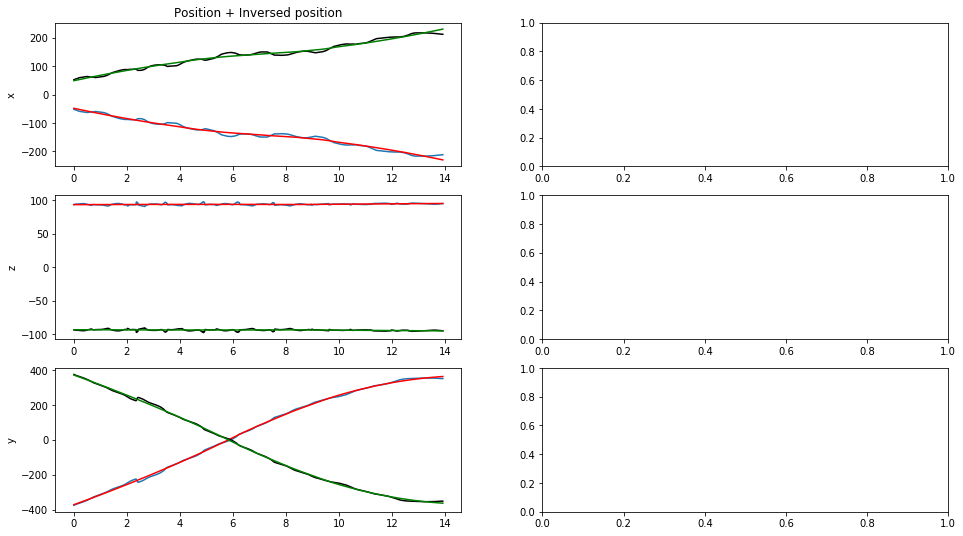

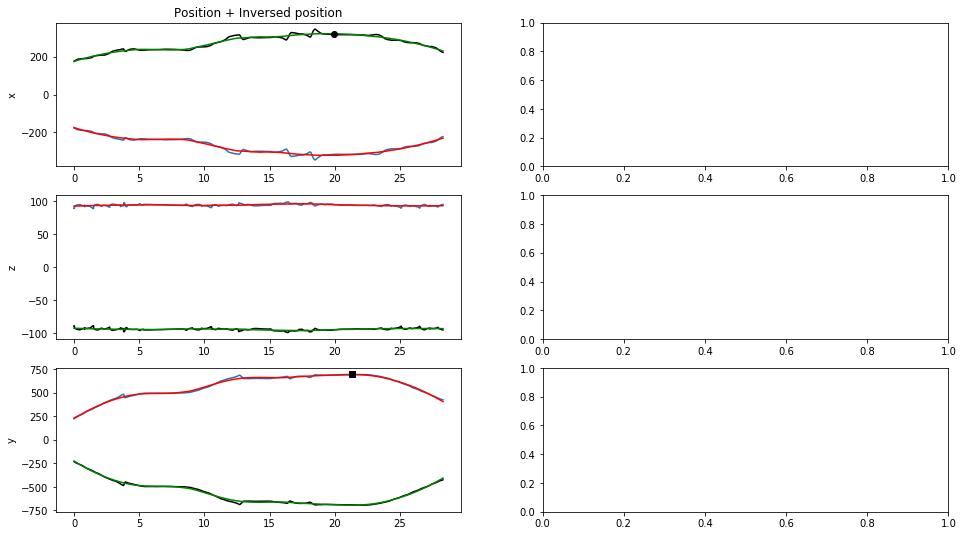

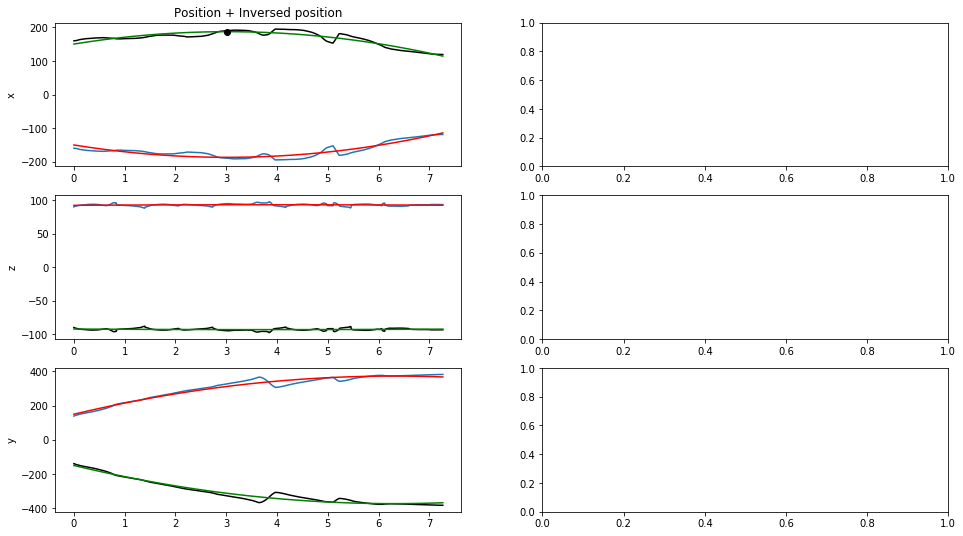

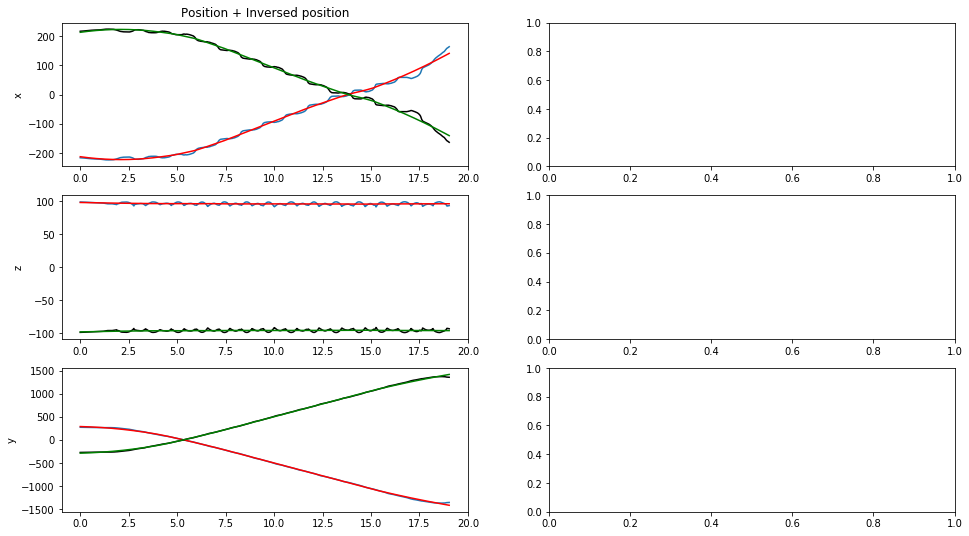

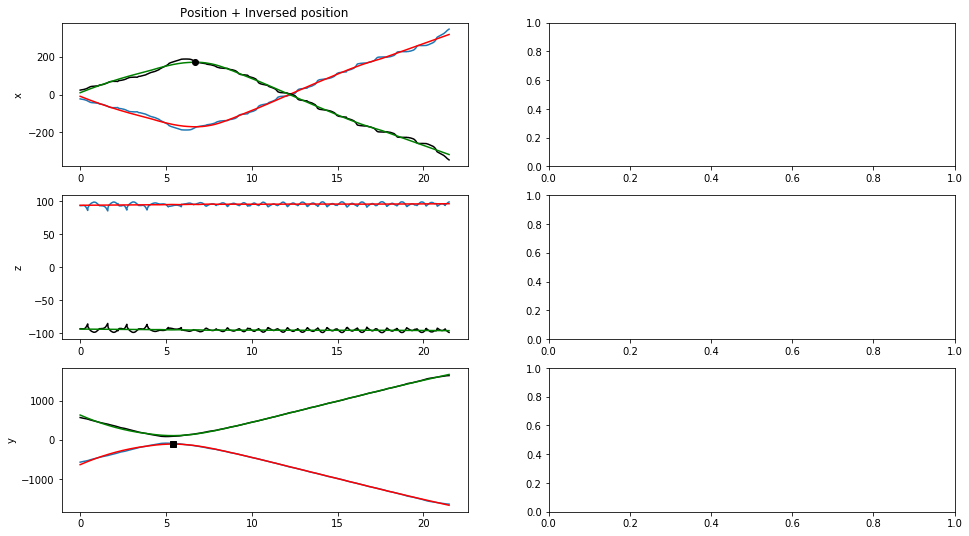

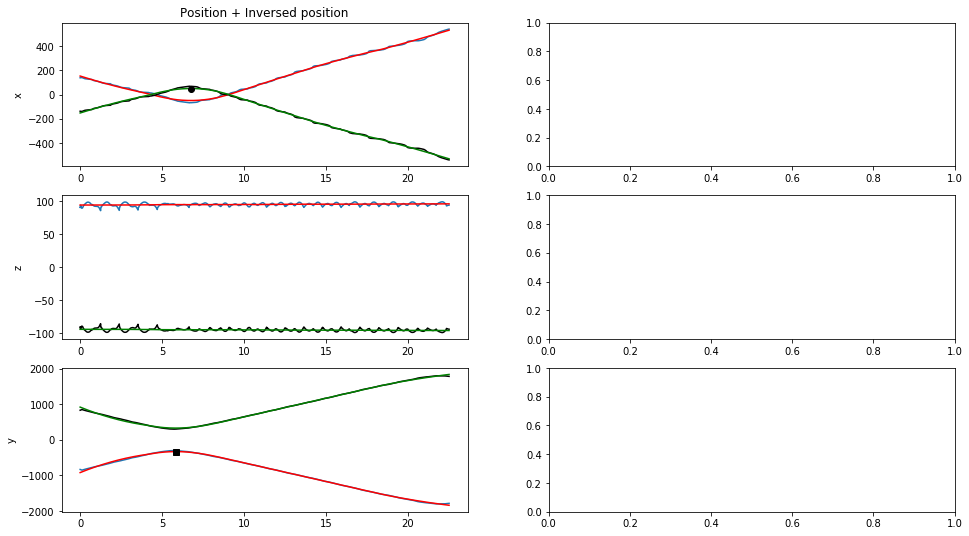

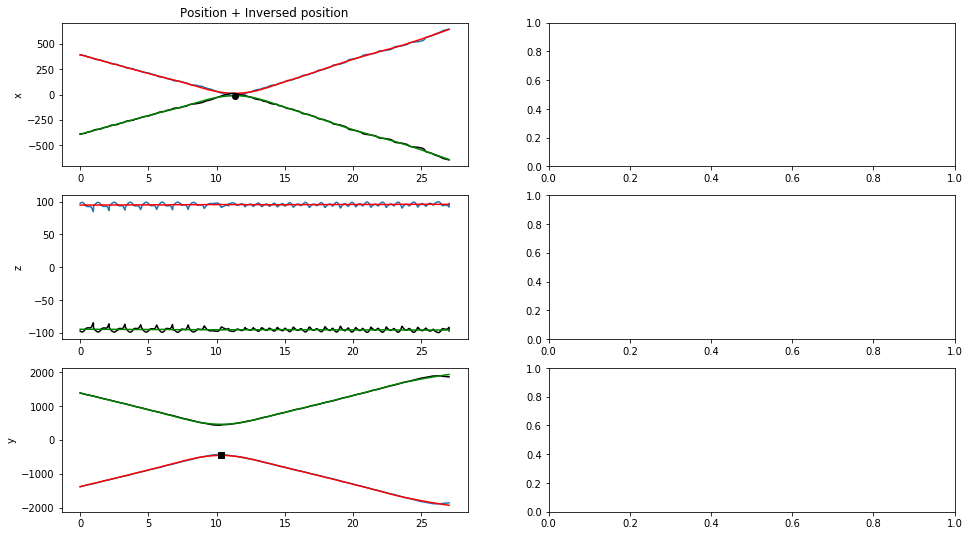

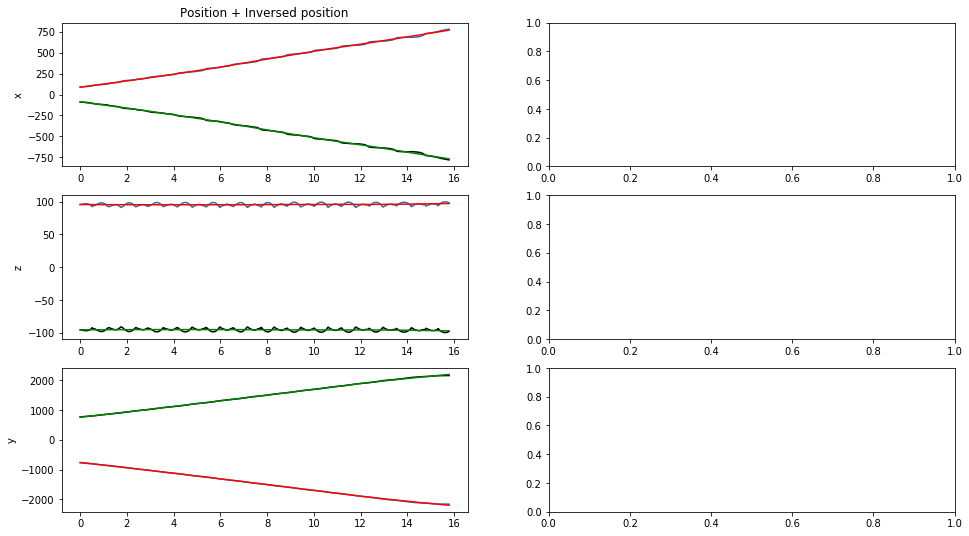

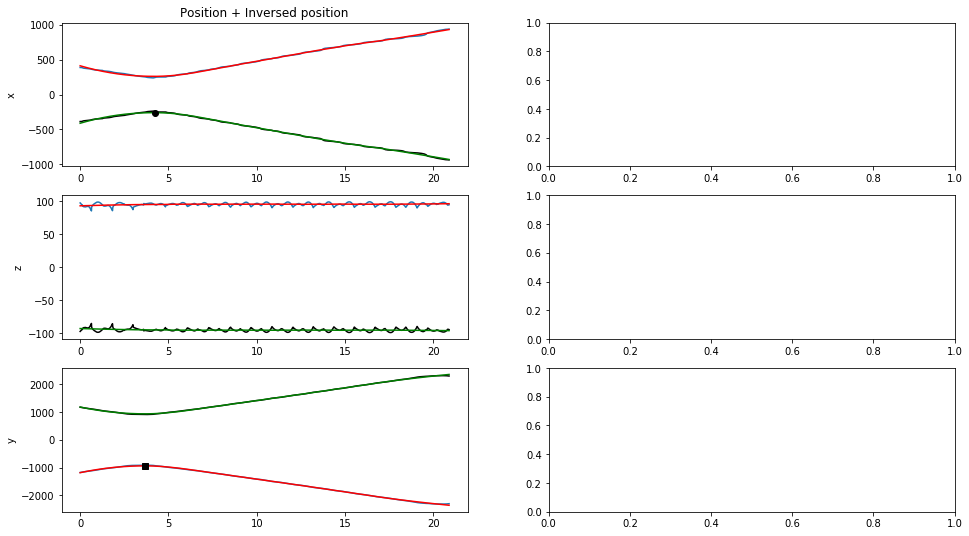

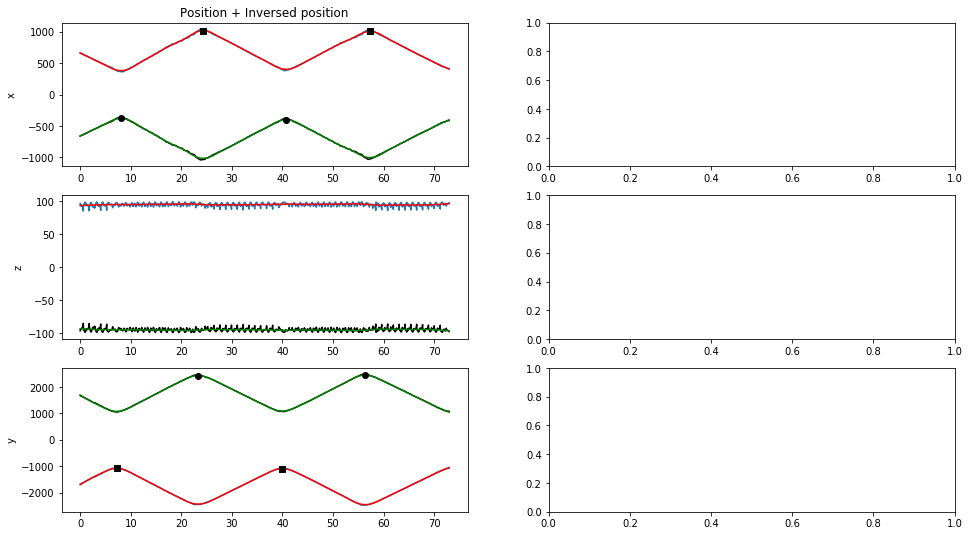

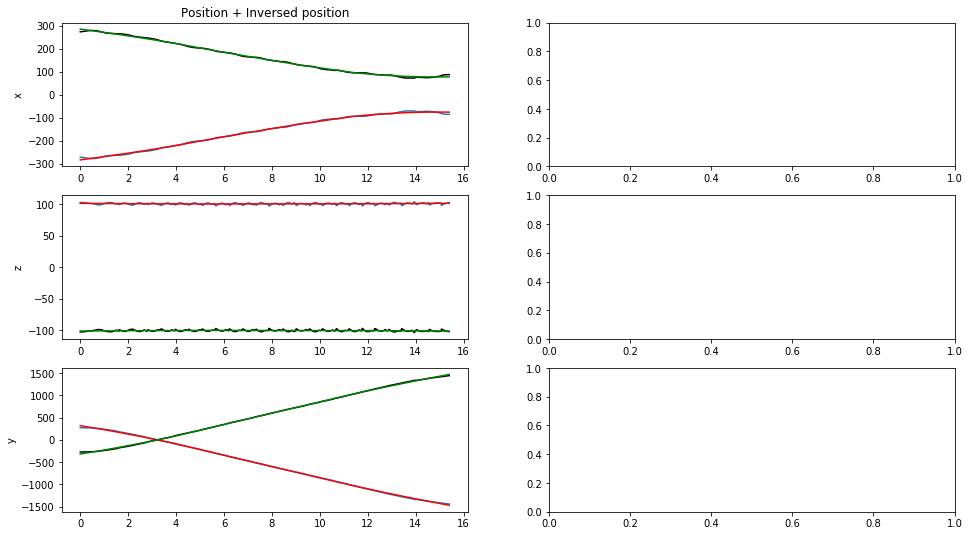

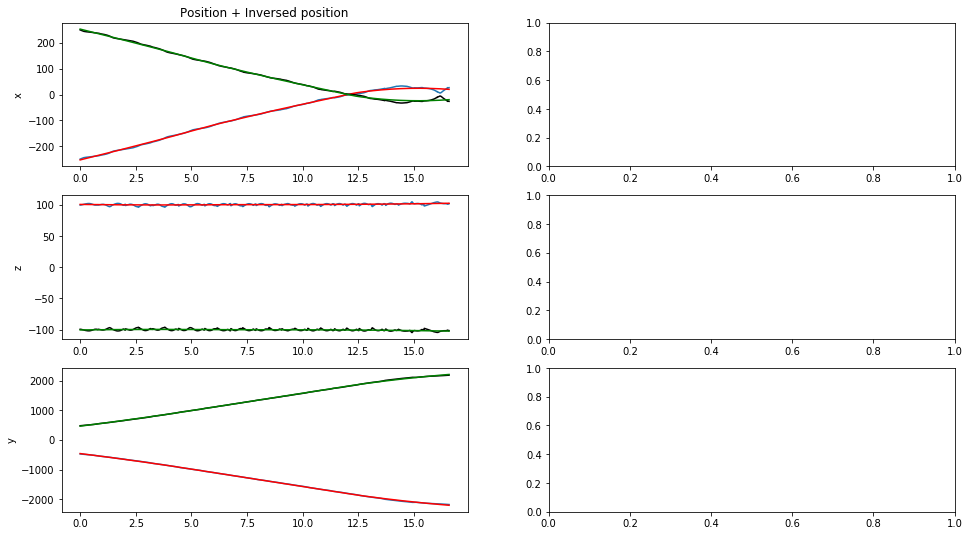

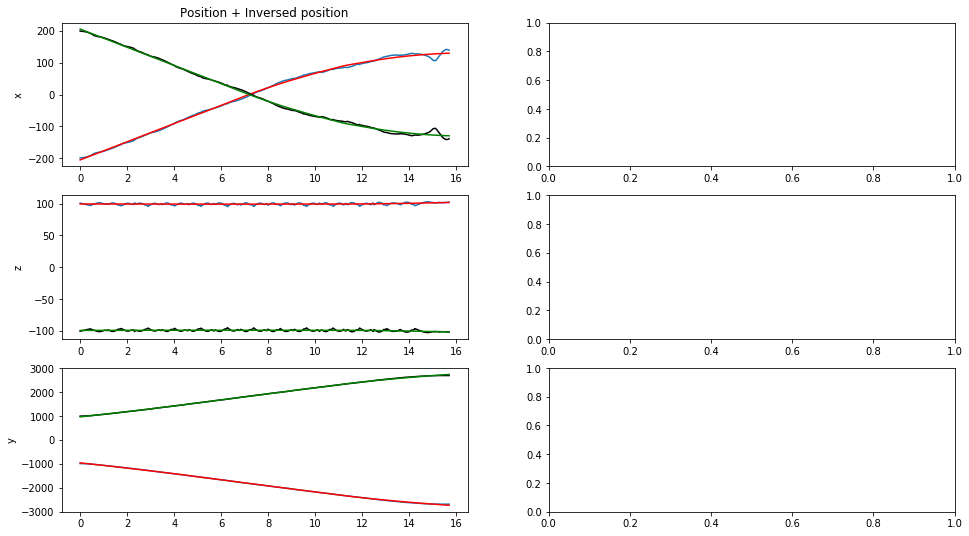

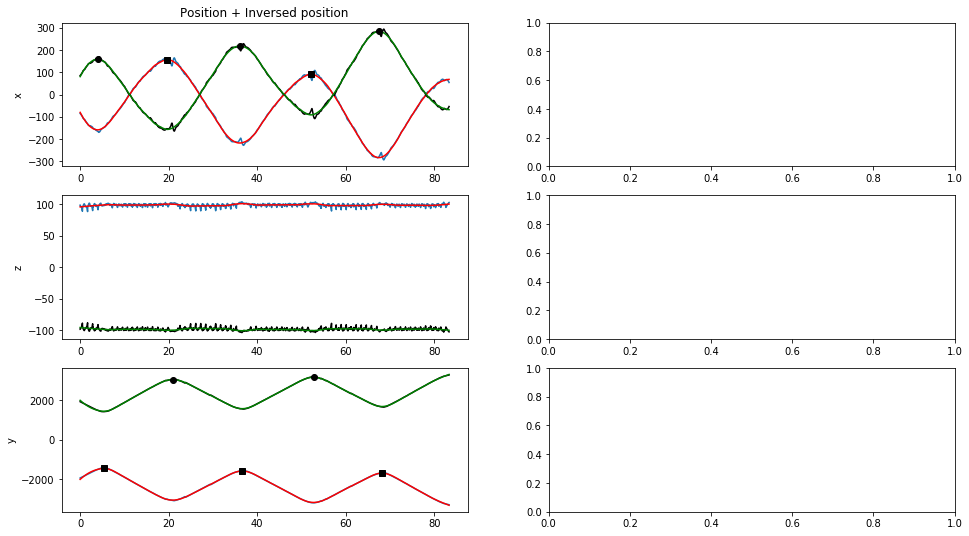

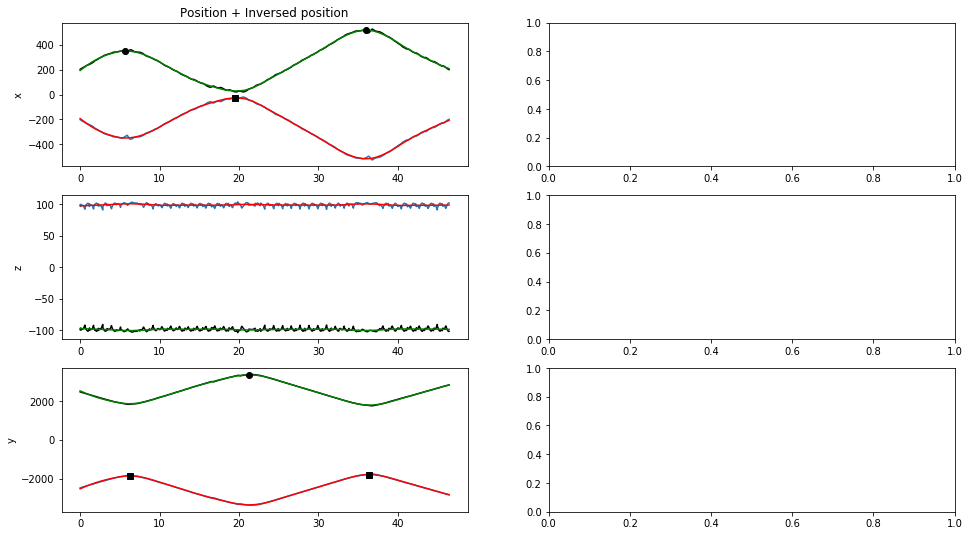

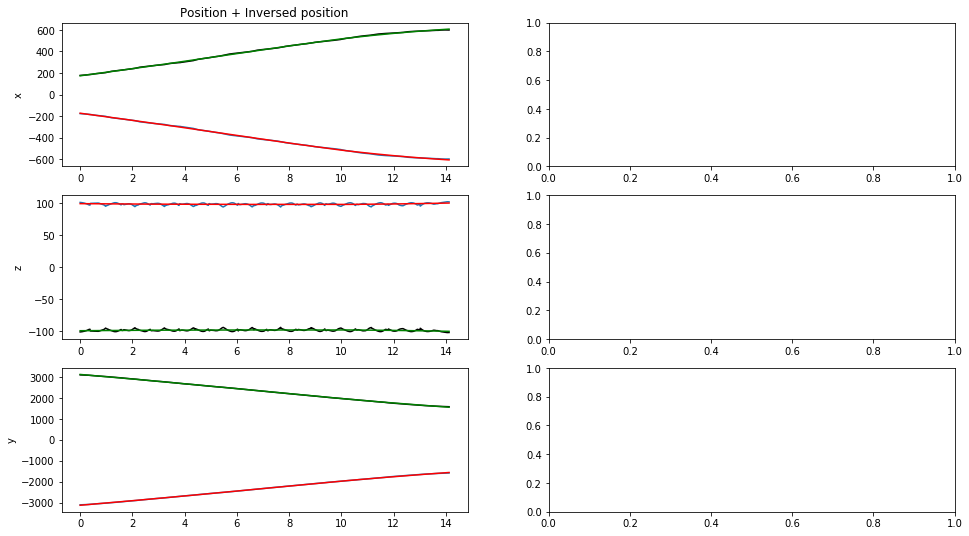

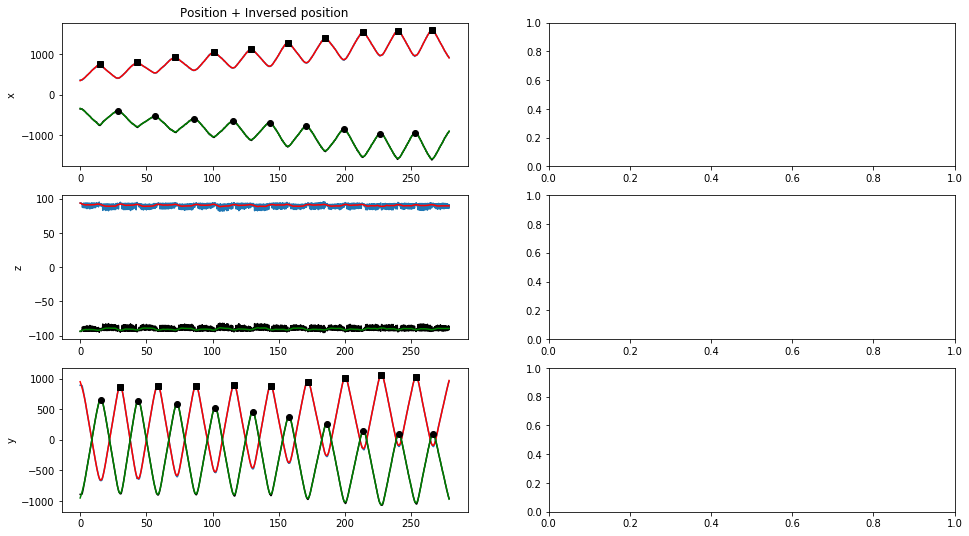

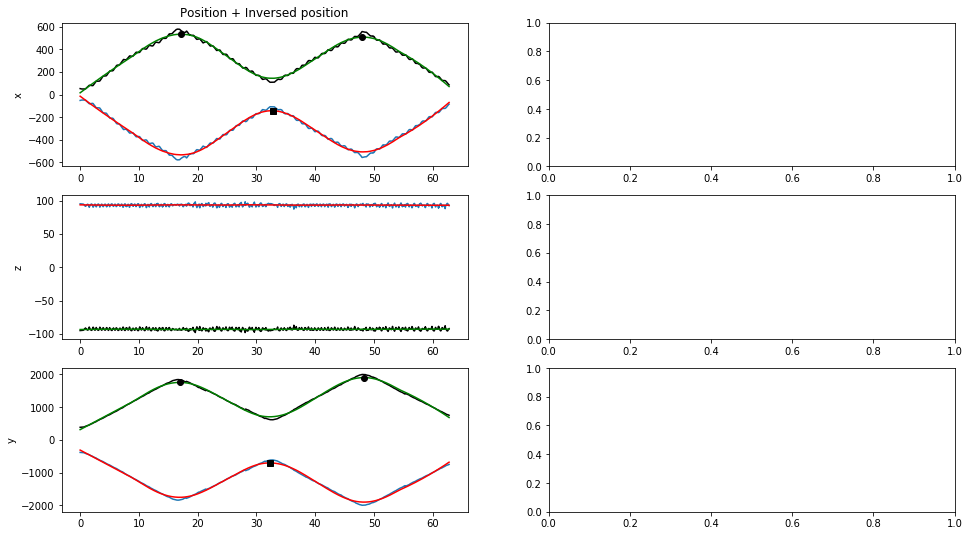

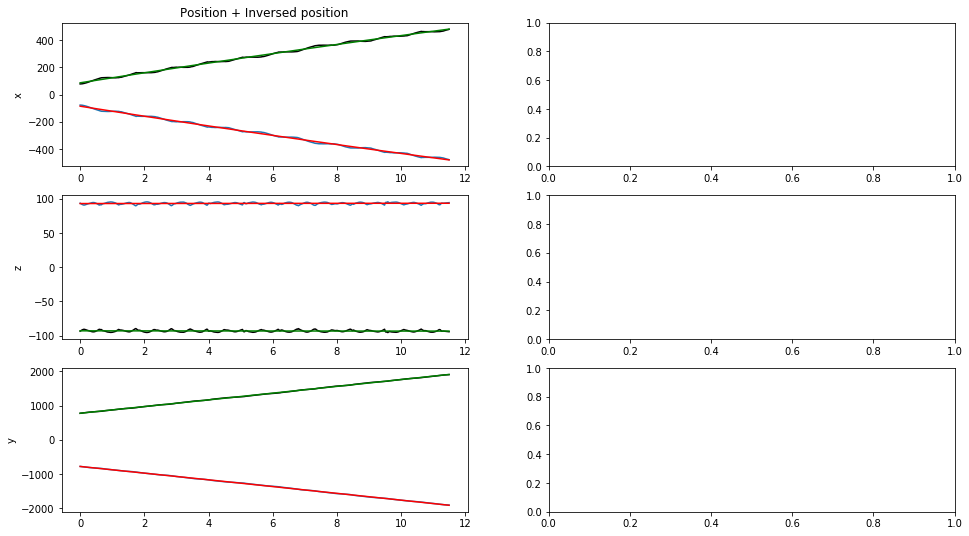

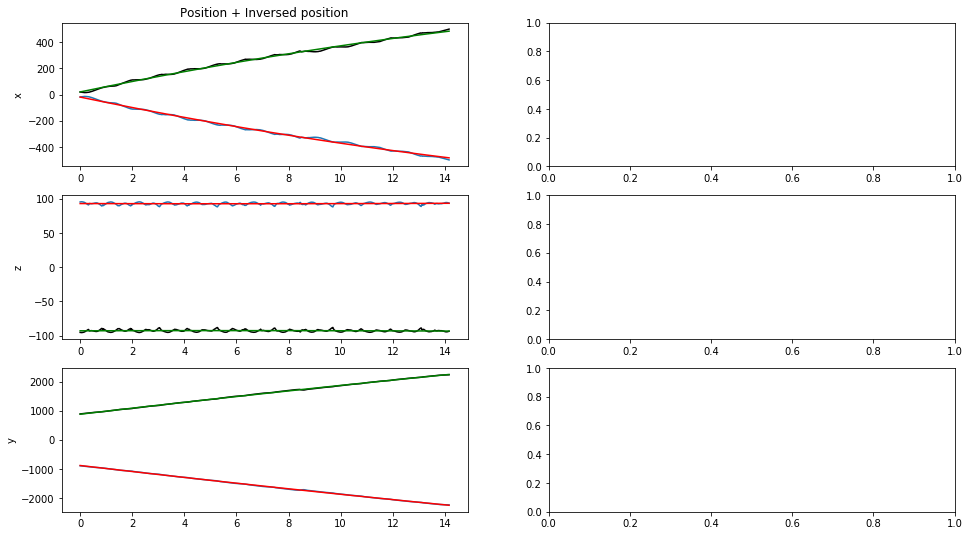

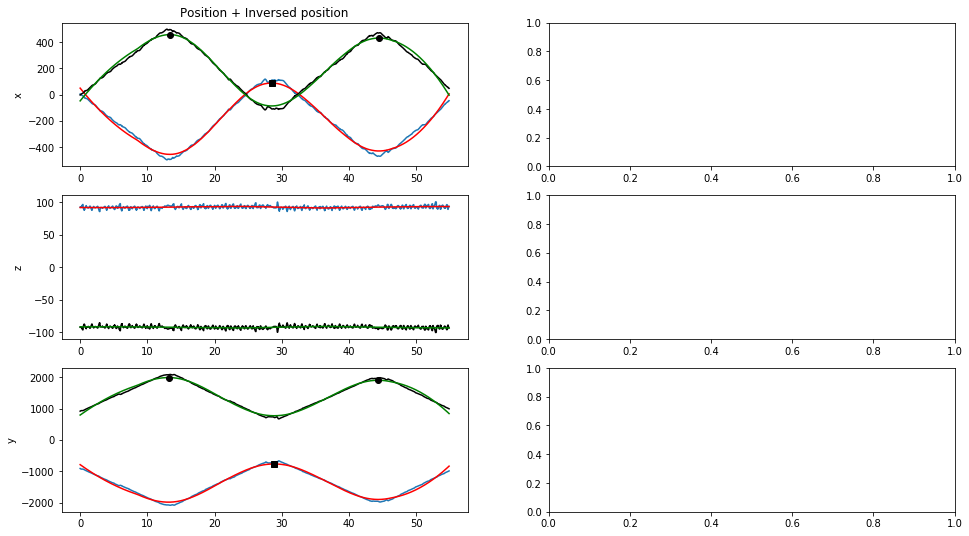

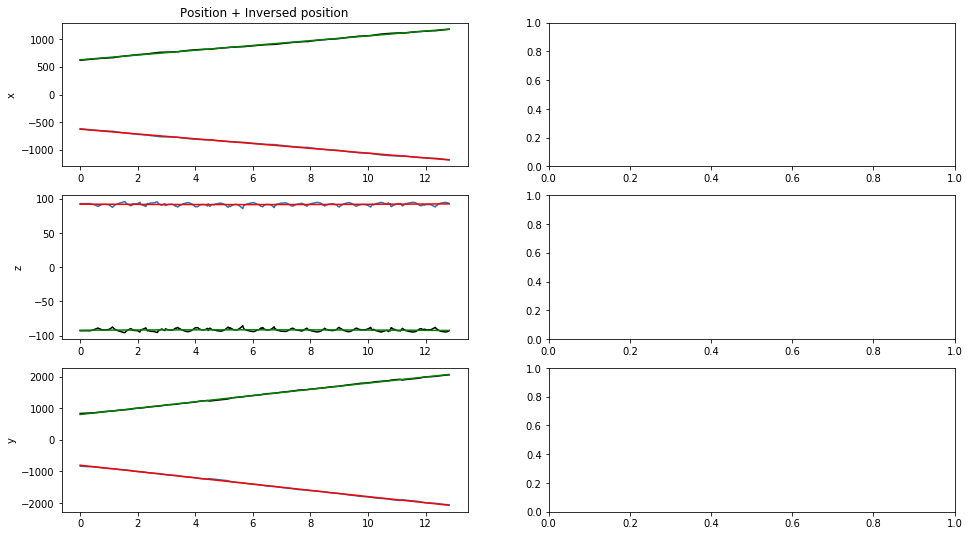

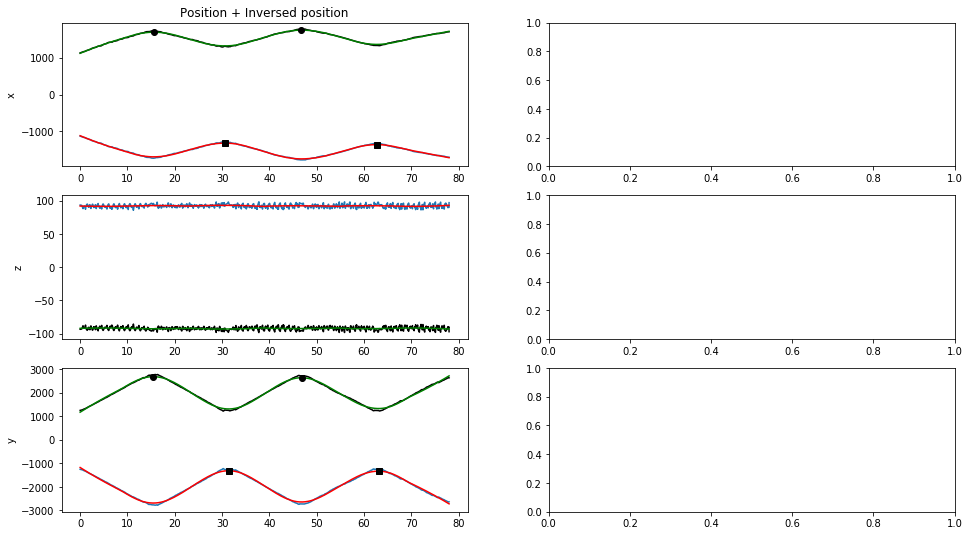

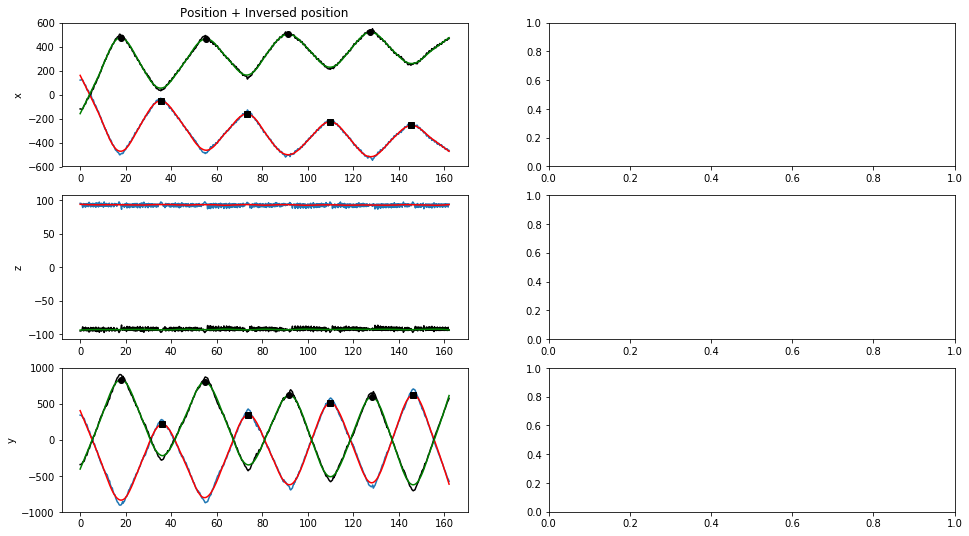

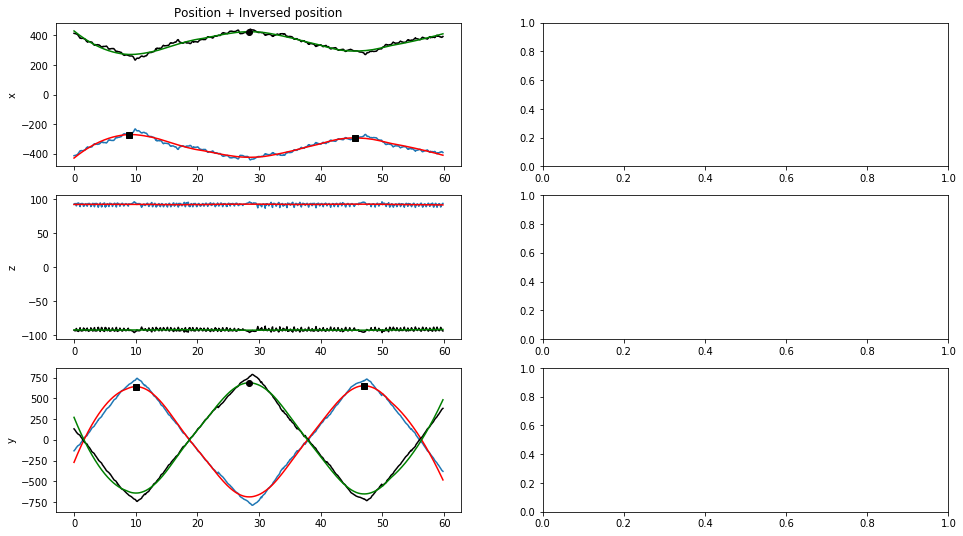

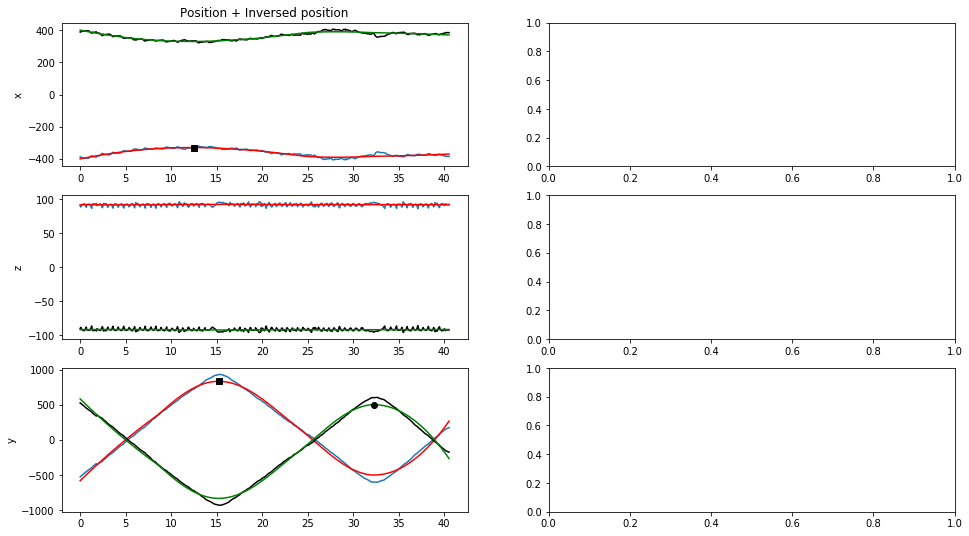

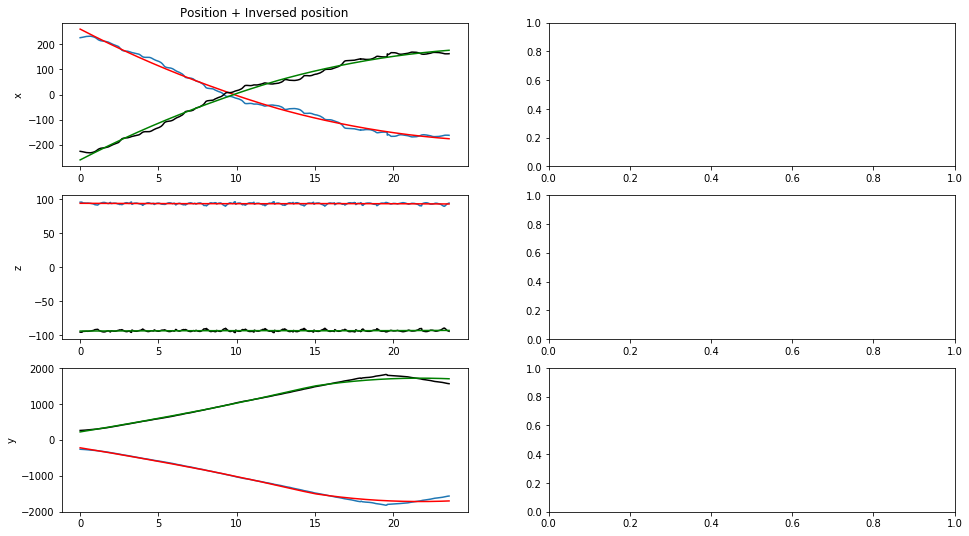

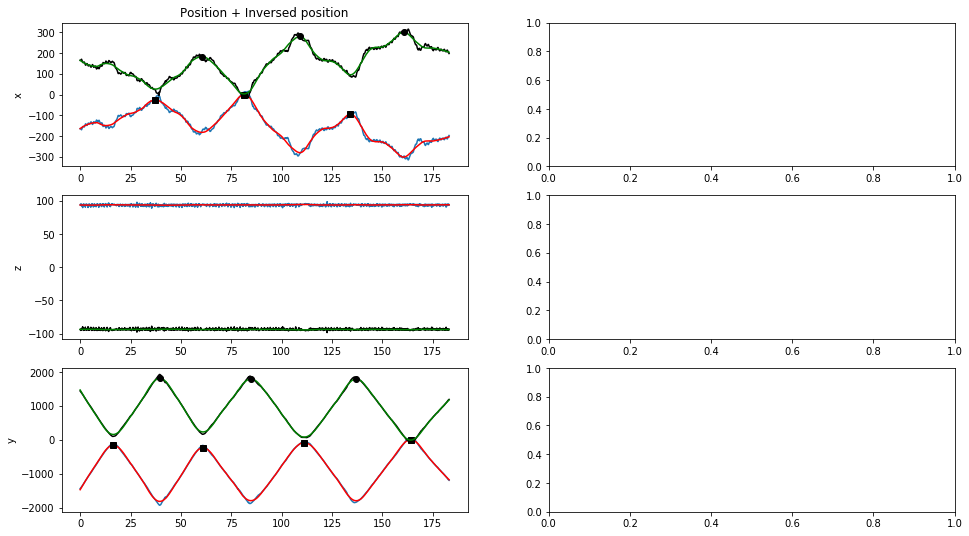

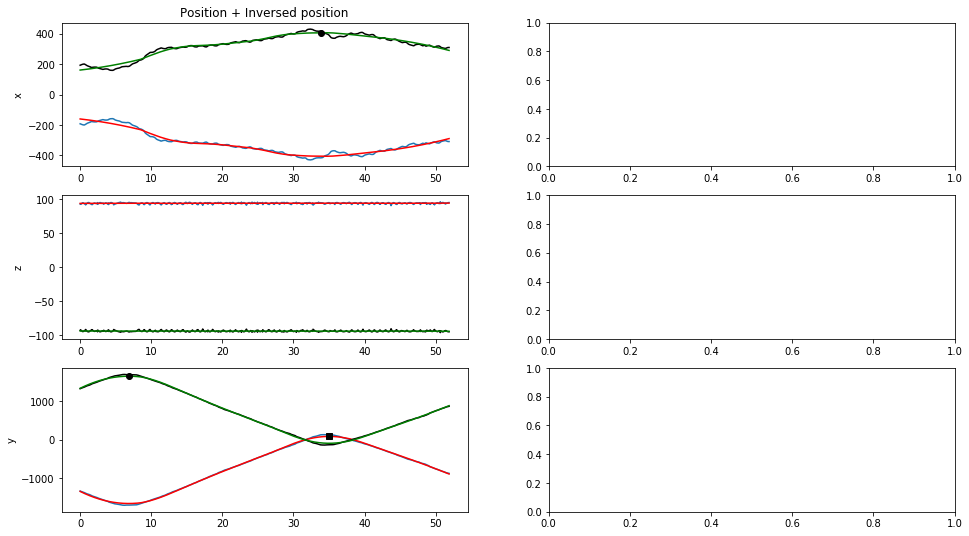

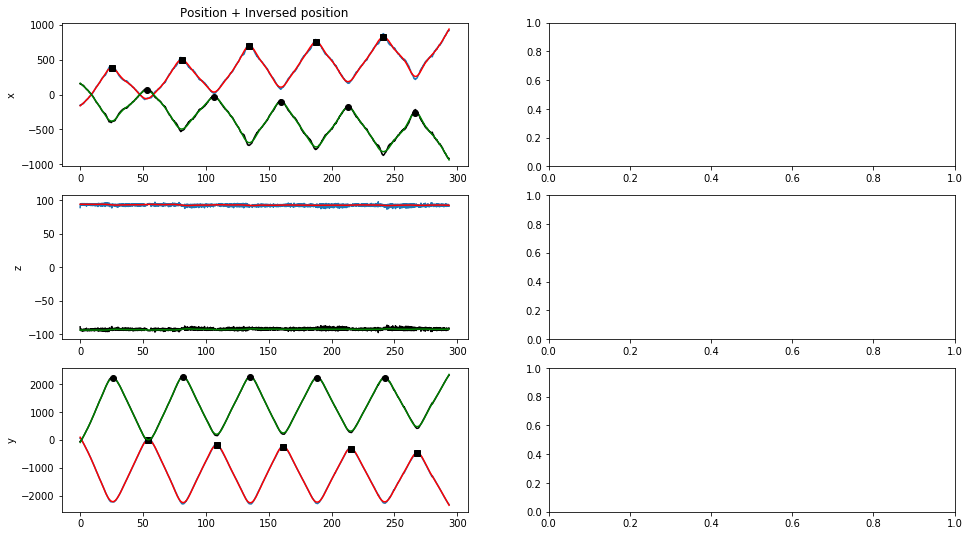

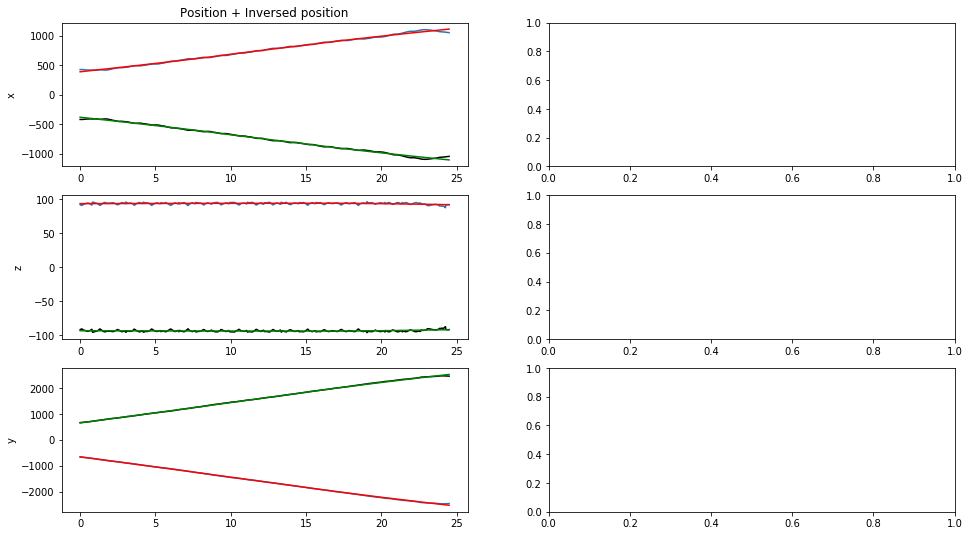

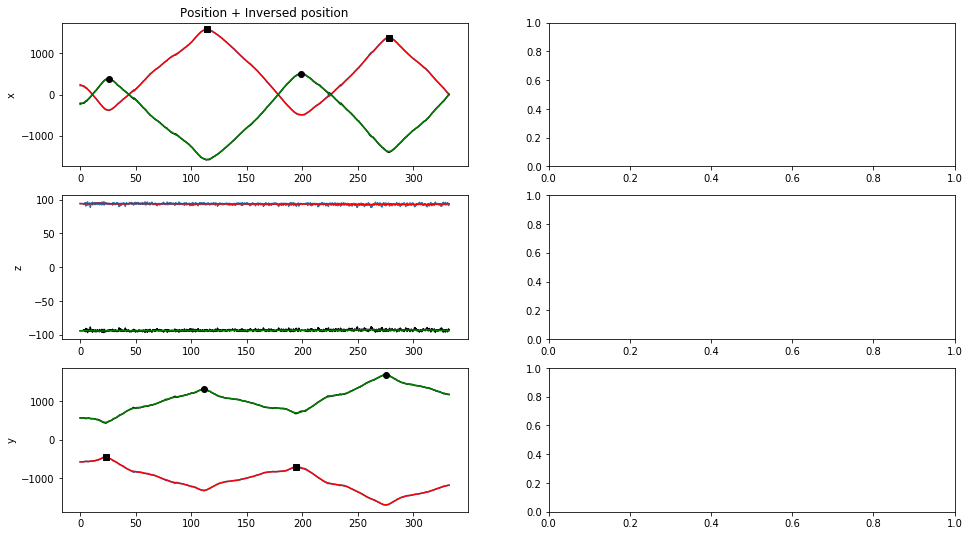

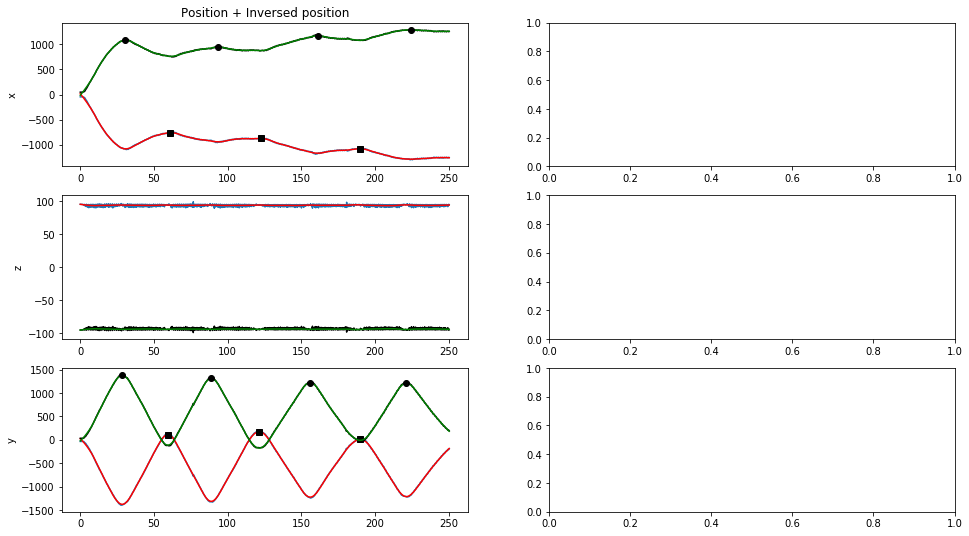

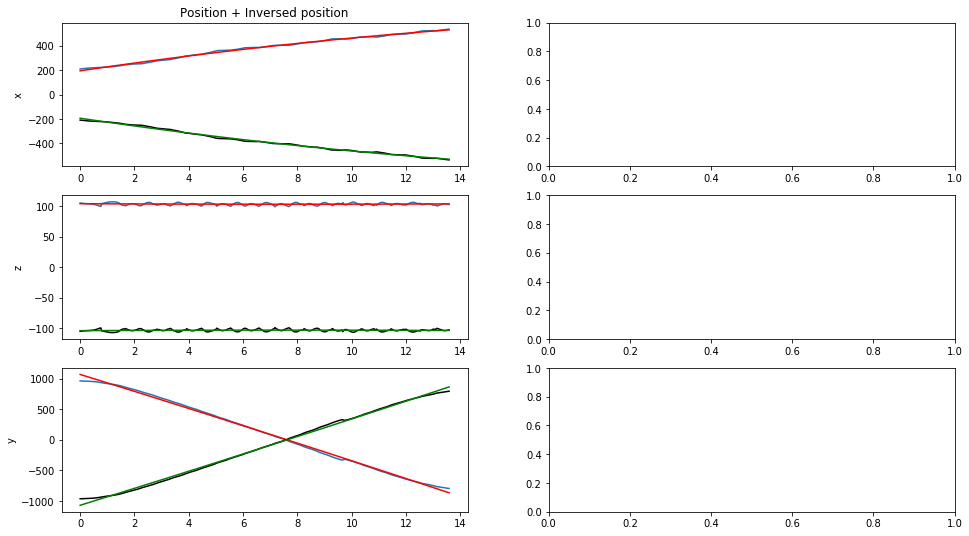

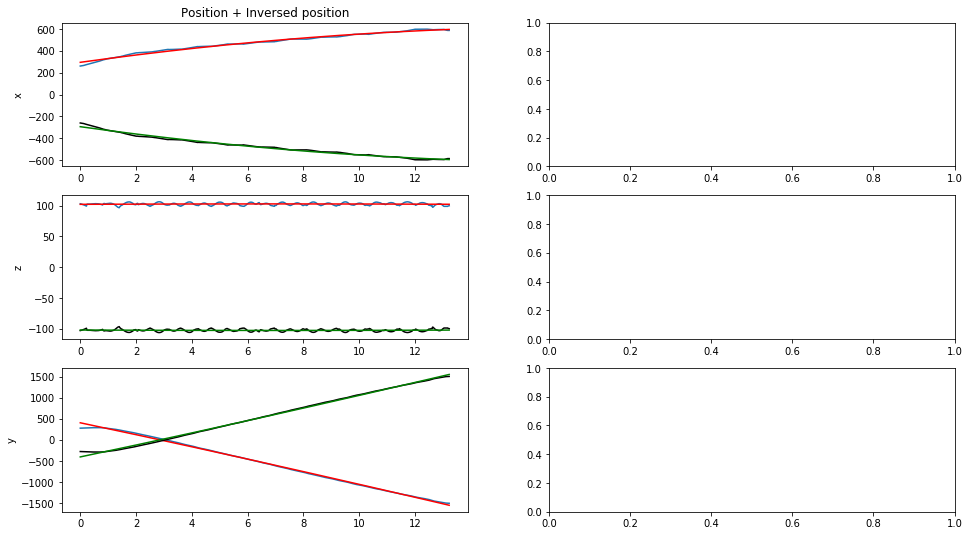

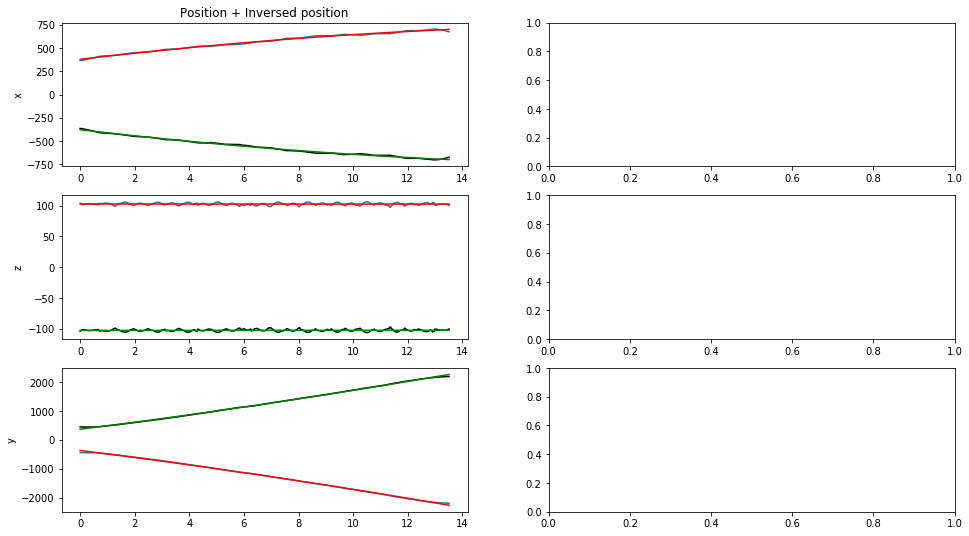

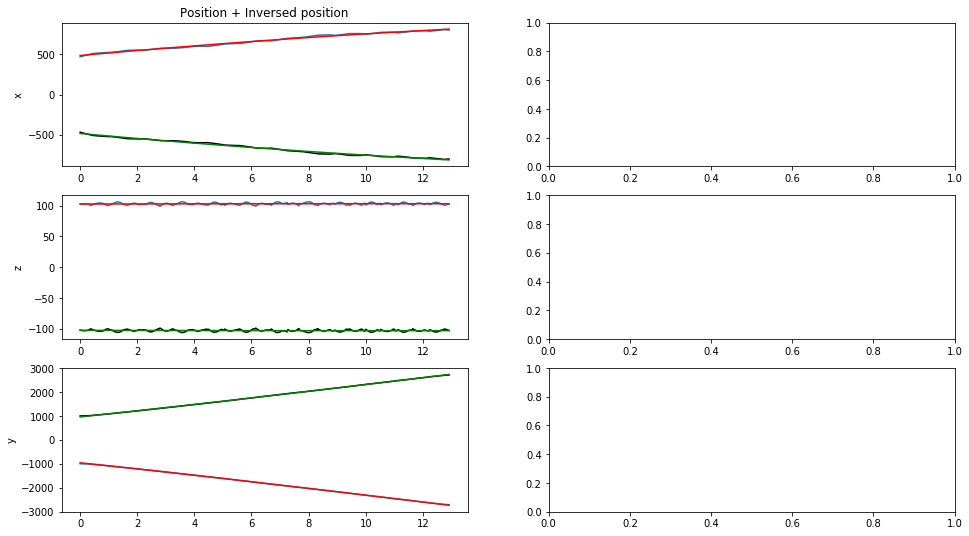

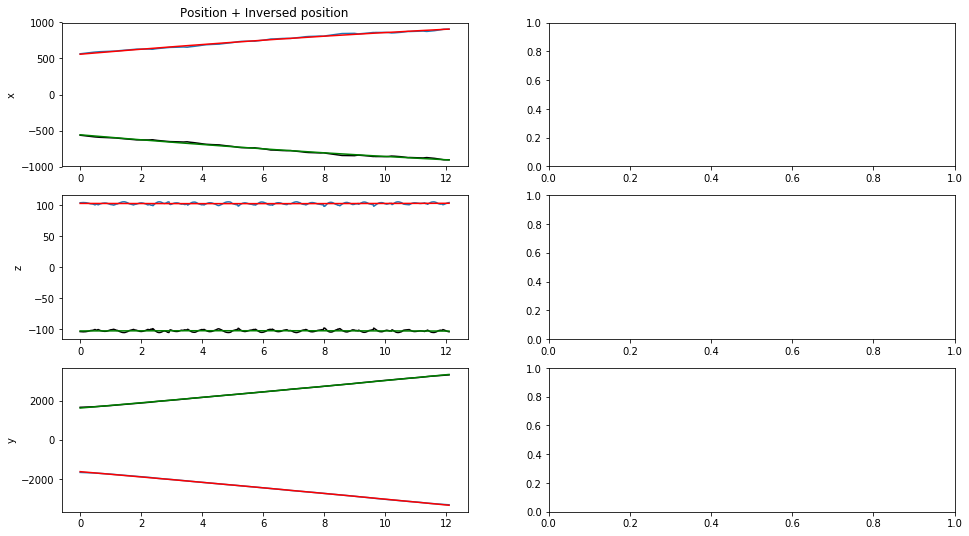

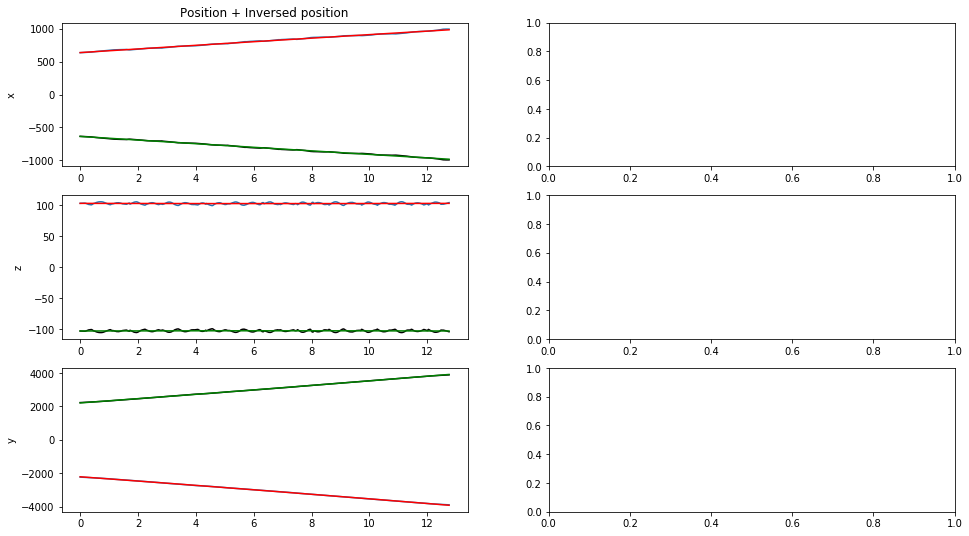

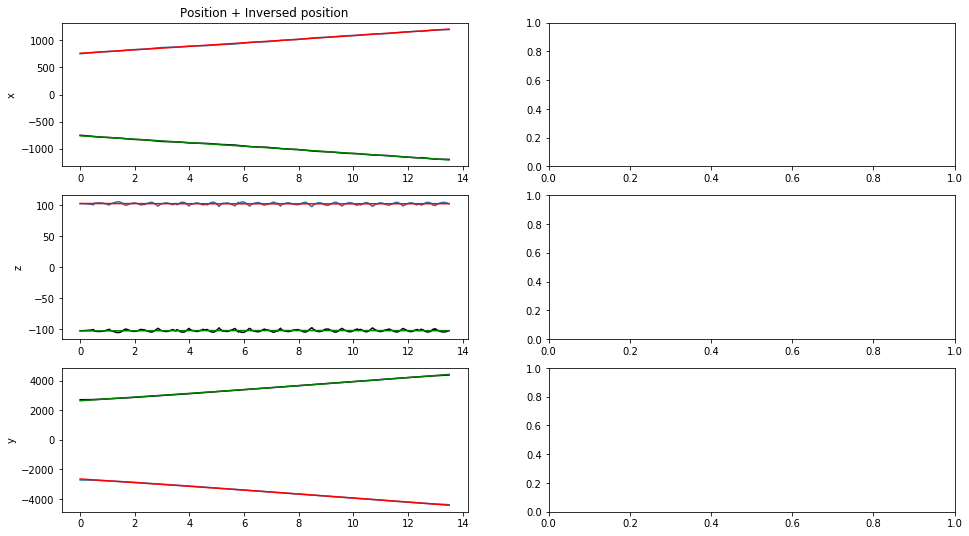

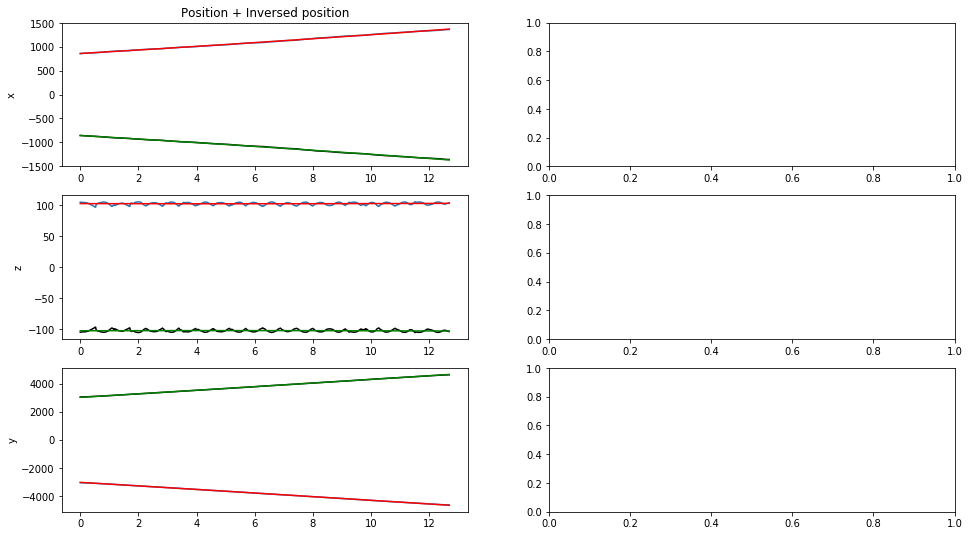

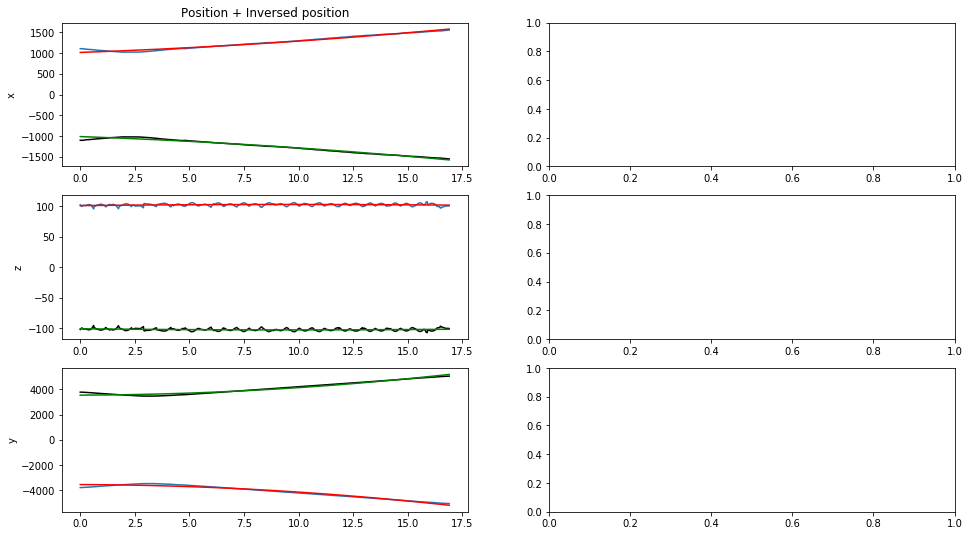

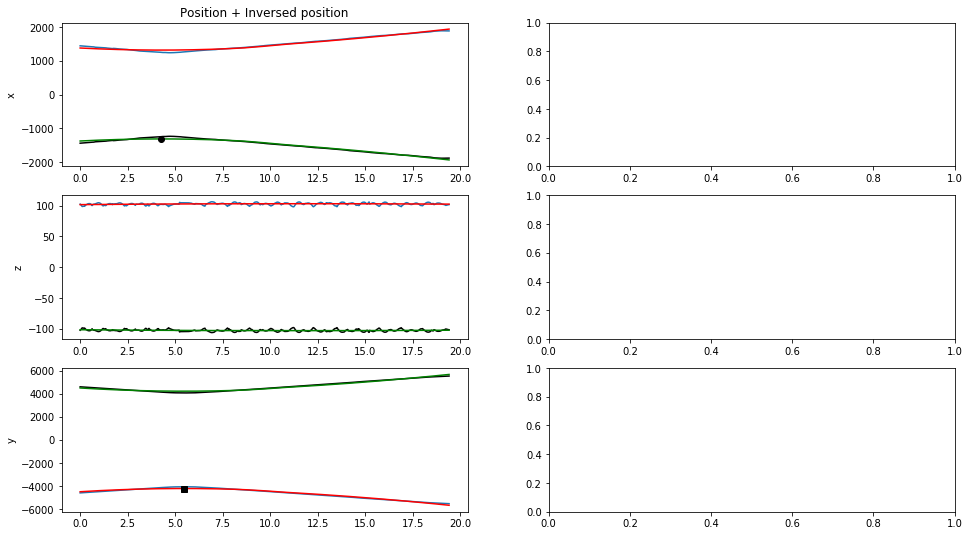

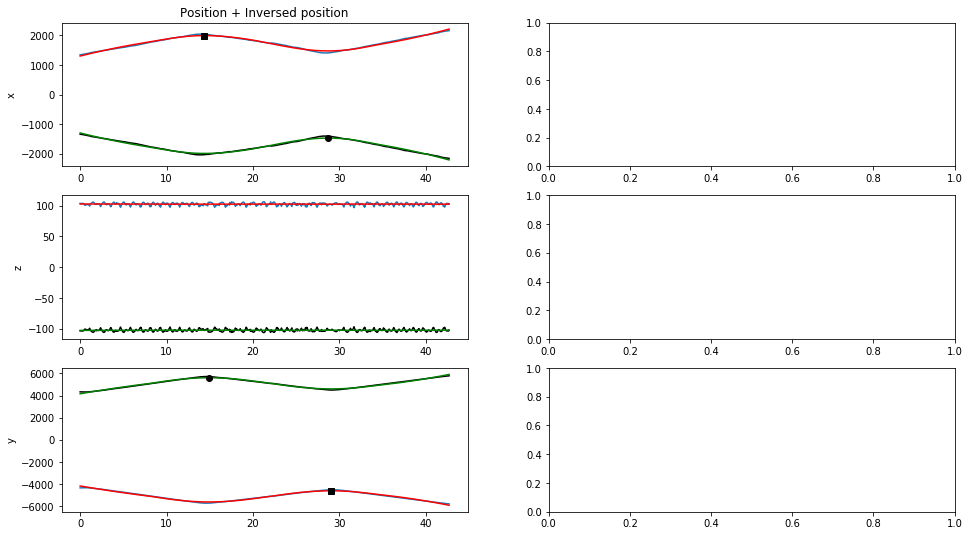

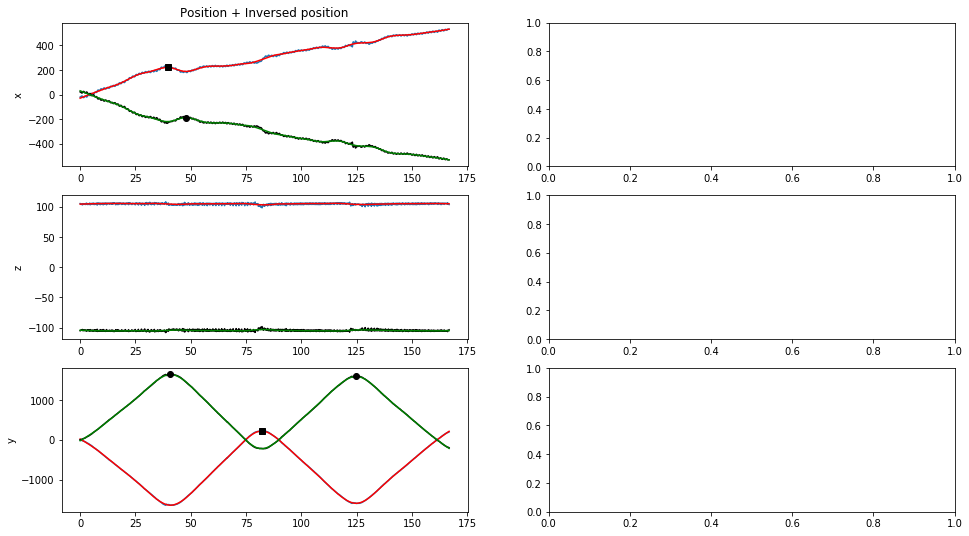

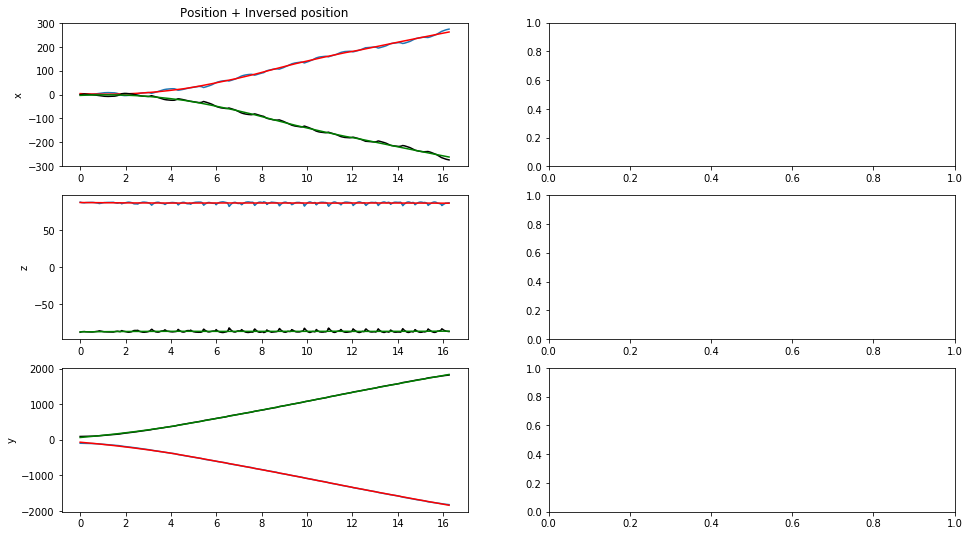

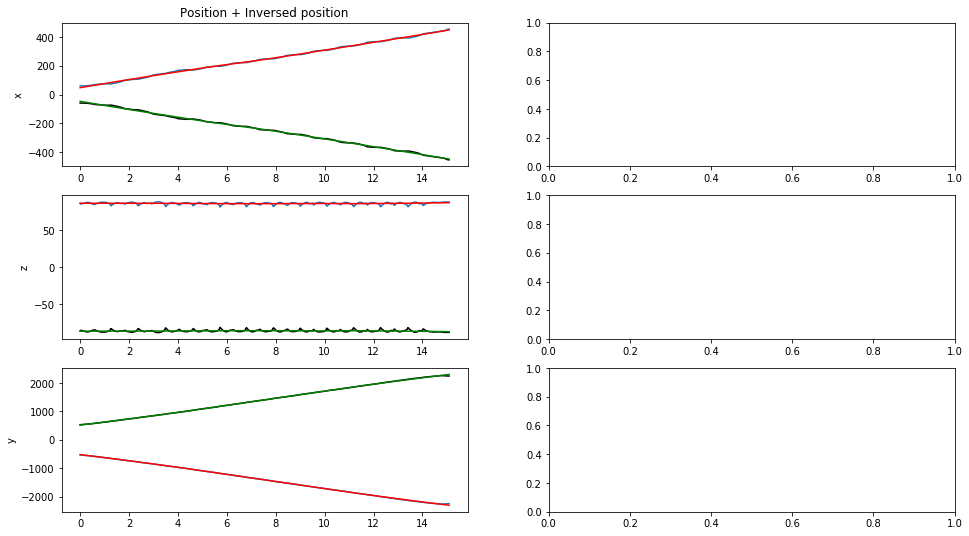

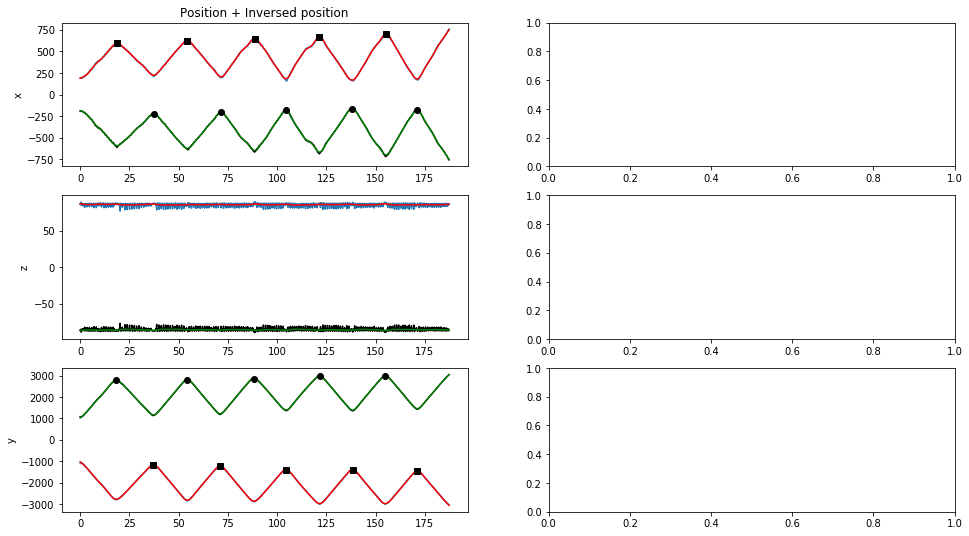

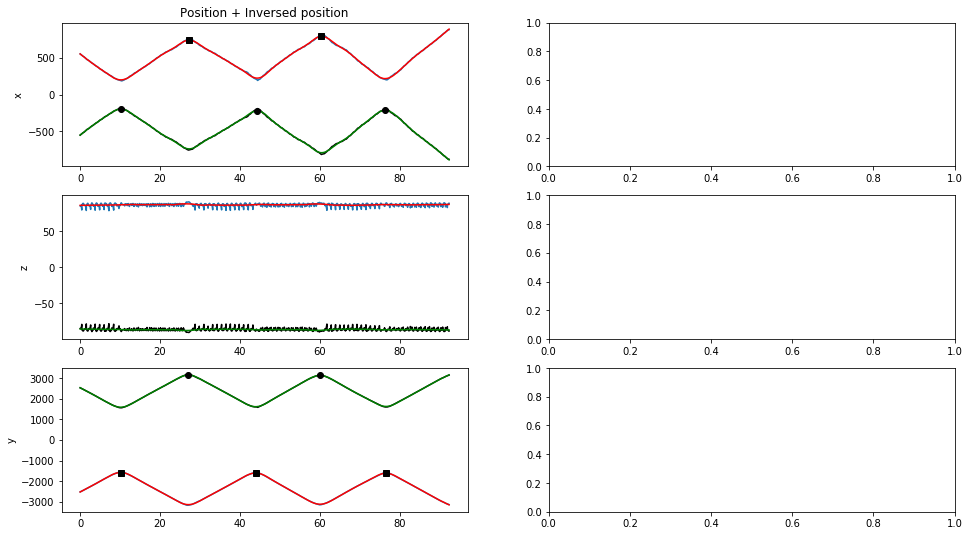

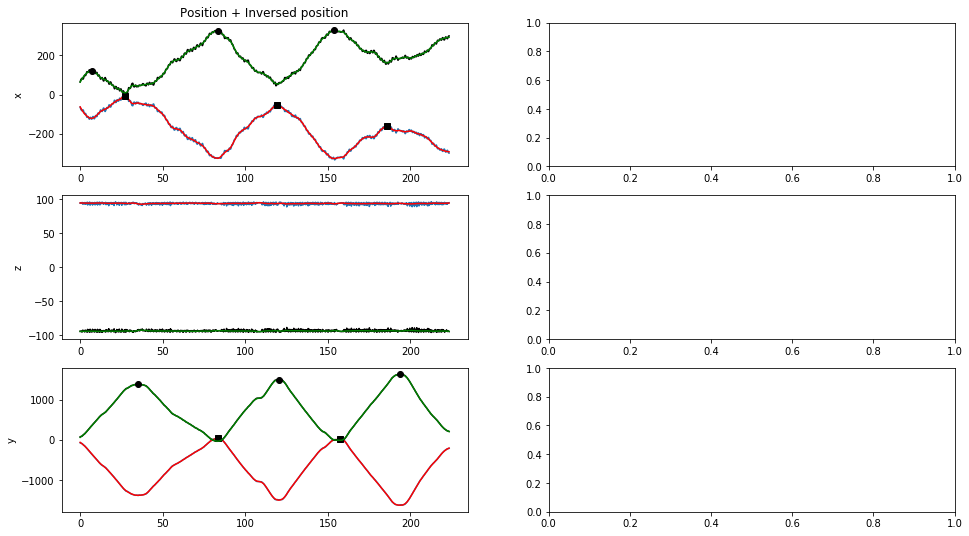

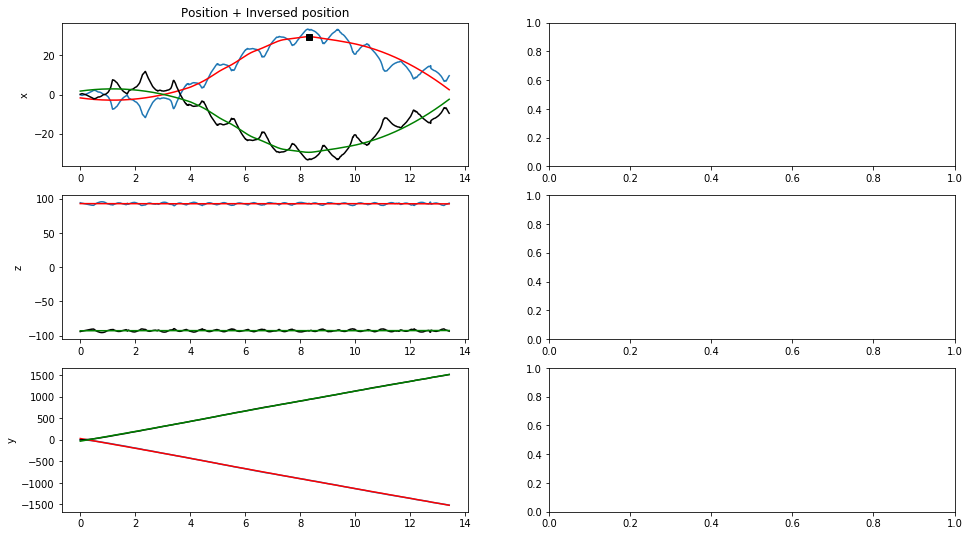

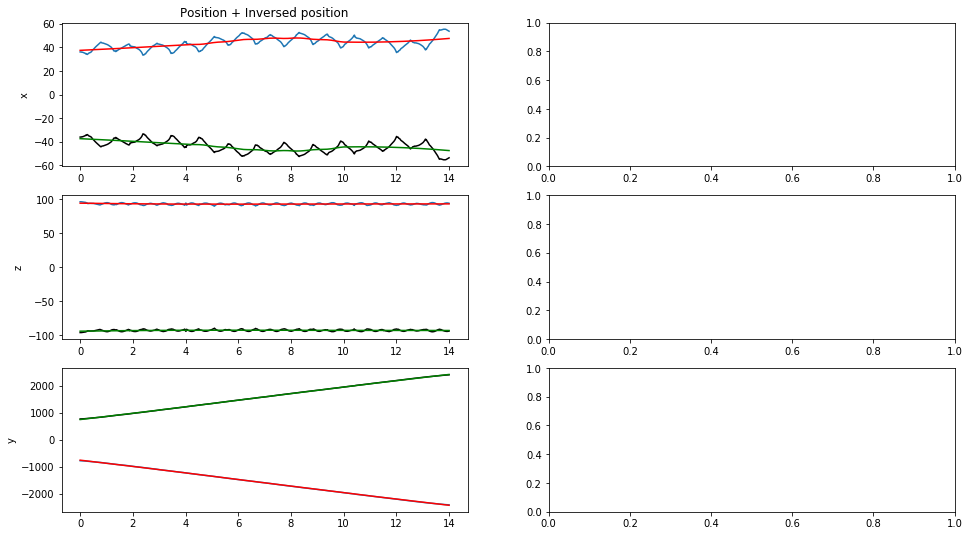

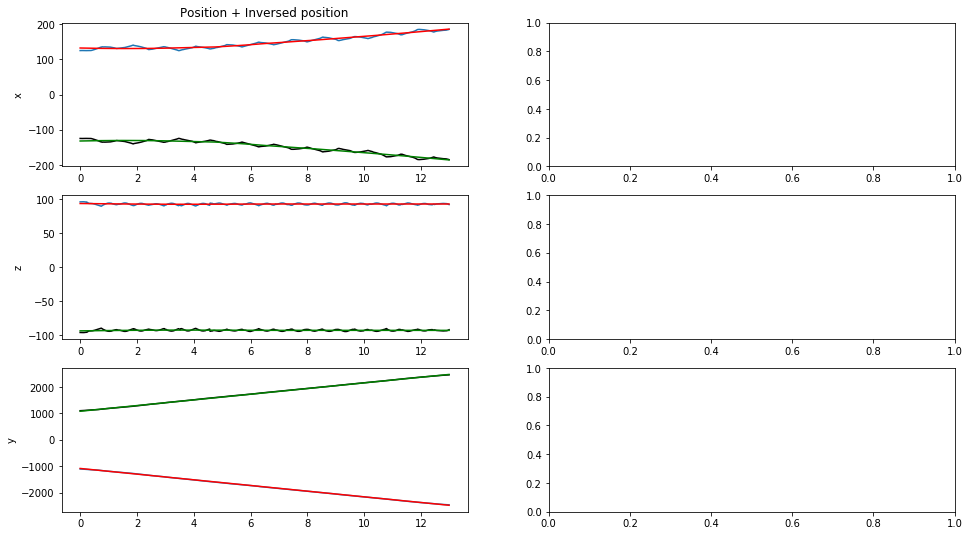

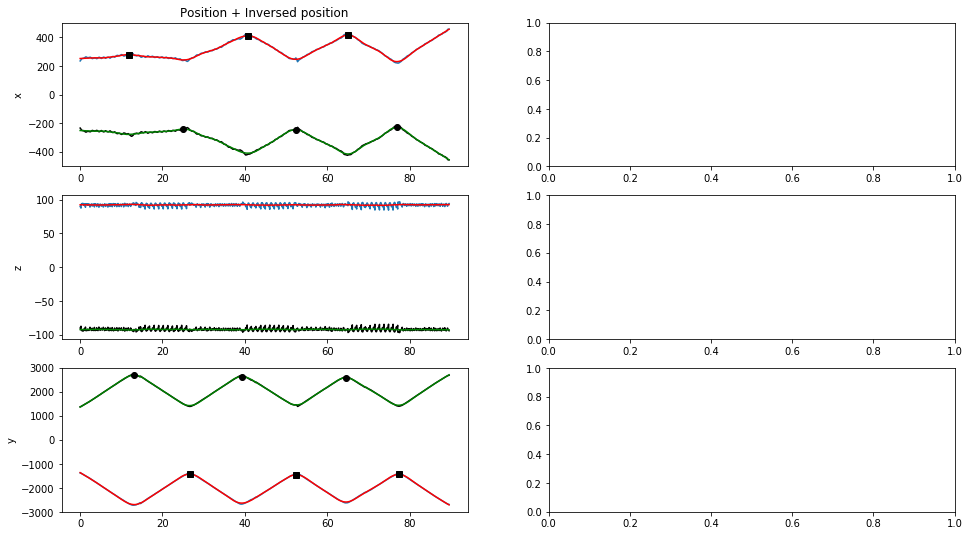

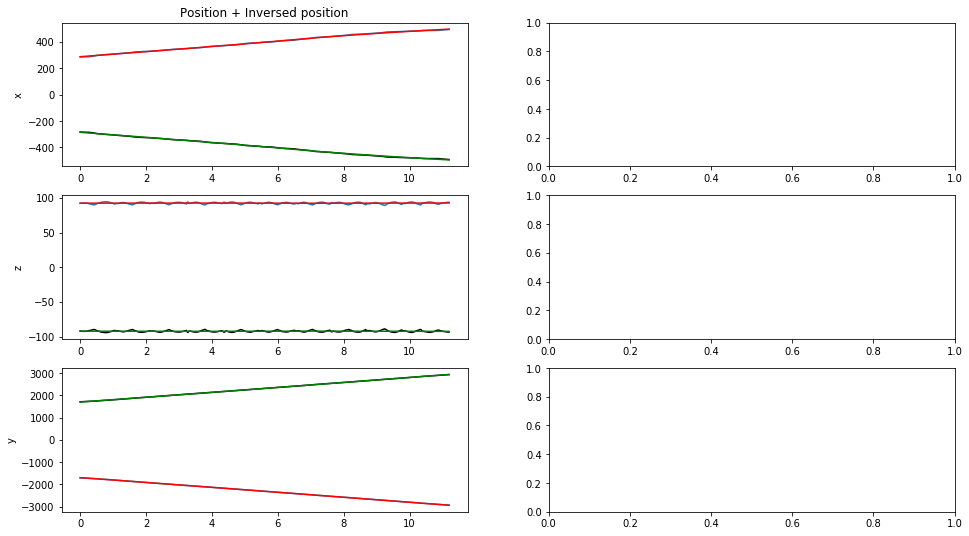

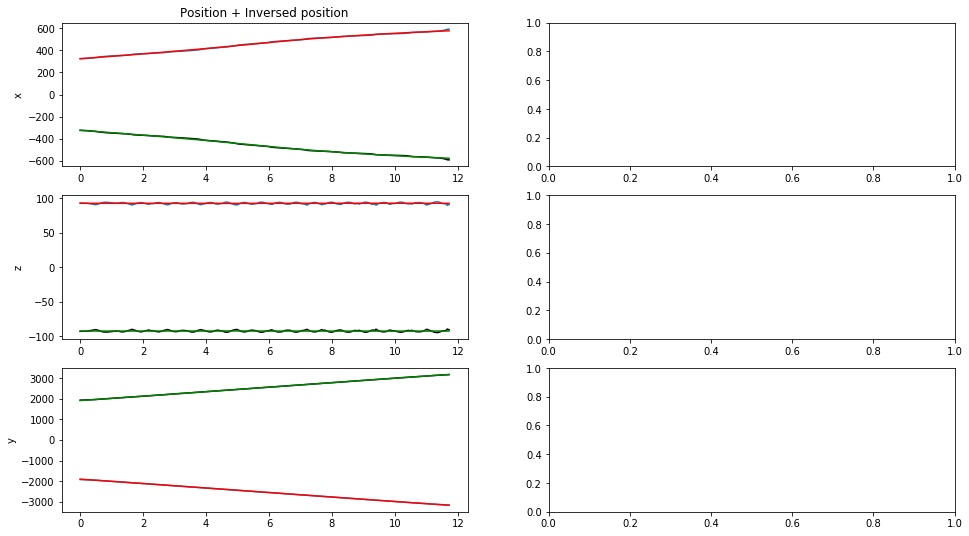

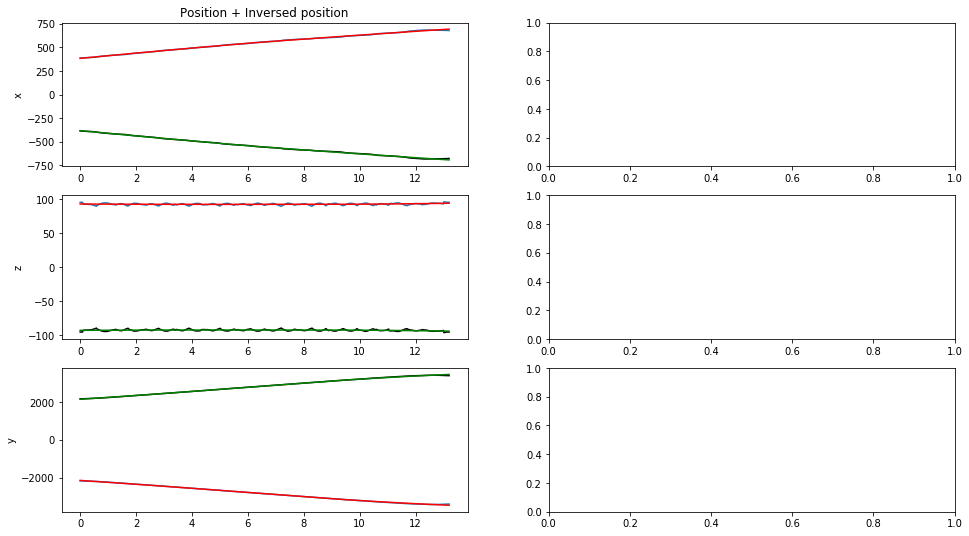

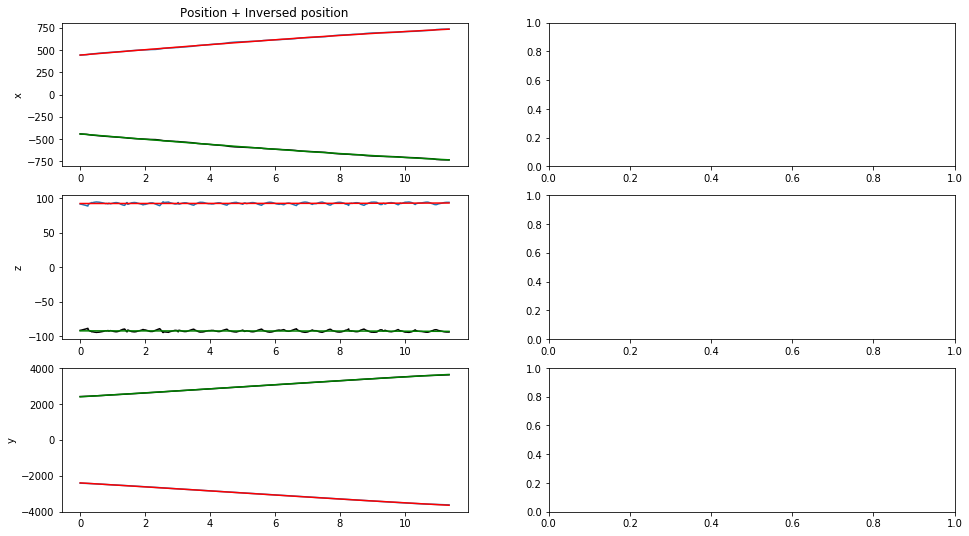

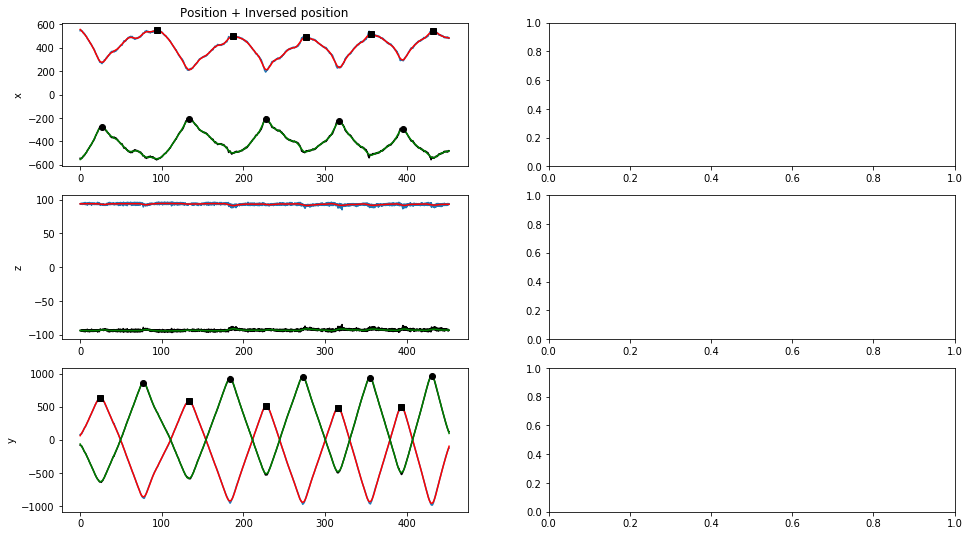

In [9]:
#corpus_joints = [0,7,8,9,10,11,12] # corpus = hips + spine + neck + head
corpus_joints = [7,8,9,10,11,12] # corpus =  spine + neck + head

for subject in X['subjectID']:
    print(subject)
    Nparts = int(X.loc[X['subjectID'] == subject,'n_parts'])
    freq = np.zeros([Nparts,1])
    
    for part in range(Nparts):        
        print(str(part+1) + '/' + str(Nparts))
    
        x = np.load(data_path + subject +'_raw_part' + str(part) + '.npy')
            
        T_sampling = X.loc[X['subjectID'] == subject,'frame_time'].values
        time = np.linspace(0, np.size(x,axis=1),num=np.size(x,axis=1))*T_sampling
        
        # TURNS IN PART ?
        fig,ax = plt.subplots(3,2,figsize = (16,9))
        xf = np.zeros_like(x)
        xfr = np.zeros_like(x)
        
        for dim in range(0,3):
            w_len = np.min((1001,len(x[0,:,dim])))
            if w_len % 2 == 0:
                w_len -= 1
            xf[0,:,dim] = savgol_filter(x[0,:,dim],w_len,2) 
            xfr[0,:,dim] = savgol_filter(-x[0,:,dim],w_len,2)
        
        ax[0,0].plot(time,x[0,:,0])
        ax[0,0].set_ylabel('x')
        #ax[0,0].set_title('Position')
        ax[1,0].plot(time,x[0,:,1])
        ax[1,0].set_ylabel('z')
        ax[2,0].plot(time,x[0,:,2])
        ax[2,0].set_ylabel('y')
        
        ax[0,0].plot(time,xf[0,:,0],'r')
        ax[1,0].plot(time,xf[0,:,1],'r')
        ax[2,0].plot(time,xf[0,:,2],'r')
        
        p = np.empty(0)
        for dim in range(0,3):
            peaks, _ = find_peaks(xf[0,:,dim],prominence=20, width=20)
            ax[dim,0].plot(time[peaks],xf[0,peaks,dim],'ks')
            p = np.concatenate((p,peaks),axis=None)

        ax[0,0].plot(time,-x[0,:,0],'k')
        ax[0,0].set_ylabel('x')
        ax[0,0].set_title('Position + Inversed position')
        ax[1,0].plot(time,-x[0,:,1],'k')
        ax[1,0].set_ylabel('z')
        ax[2,0].plot(time,-x[0,:,2],'k')
        ax[2,0].set_ylabel('y')
        
        ax[0,0].plot(time,xfr[0,:,0],'g')
        ax[1,0].plot(time,xfr[0,:,1],'g')
        ax[2,0].plot(time,xfr[0,:,2],'g')
        
        pr = np.empty(0)
        for dim in range(0,3):
            peaksr, _ = find_peaks(xfr[0,:,dim],prominence=20, width=20)
            ax[dim,0].plot(time[peaksr],xfr[0,peaksr,dim],'ko')
            pr = np.concatenate((pr,peaksr),axis=None)
       
        turns = np.concatenate((p,pr),axis=None)
        print(len(turns))
        
        if np.size(turns)==1:
            num = np.size(x,axis=1)
            if num/2 > turns:    
                x = x[:,int(turns):,:]
            else:
                x = x[:,int(turns):,:]
            
            
        
        thisDF = pd.DataFrame(data={'subjectID':subject,'type':X.loc[X['subjectID'] == subject,'type'],
                        'part':part,'t_sampling':T_sampling,'sample_len':np.size(x,axis=1),
                        'time_len':np.size(x,axis=1)*T_sampling,'n_turns': np.size(turns)})
        
        parts = pd.concat([parts, thisDF],ignore_index=True,sort=False)
        
        '''
        a_corpus = np.zeros_like(x[len(corpus_joints),:,0])
        for c in corpus_joints:
            a_corpus += np.sum(x[c,:,3:6],axis=1)
        a_corpus = a_corpus / len(corpus_joints)
        #a_corpus = savgol_filter(a_corpus,101,2)
        
        a_hips = np.sum(x[0,:,3:6],axis=1)
        
        # Limb 
        a_RF = np.sum(x[3,:,3:6],axis=1)
        a_LF = np.sum(x[6,:,3:6],axis=1)
        
        a_RH = np.sum(x[16,:,3:6],axis=1)
        a_LH = np.sum(x[39,:,3:6],axis=1)
        
        fig,ax = plt.subplots(3,2,figsize = (16,9))
        
        ax[0,0].plot(time,a_RH)
        ax[0,0].set_title('RH')
        ax[0,1].plot(time,a_LH)
        ax[0,1].set_title('LH')
        ax[1,0].plot(time,a_RF)
        ax[1,0].set_title('RF')
        ax[1,1].plot(time,a_LF)
        ax[1,1].set_title('LF')
        
        ax[2,0].plot(time,a_corpus)
        ax[2,0].set_title('corpus')
        
        ax[2,1].plot(time,a_hips)
        ax[2,1].set_title('hips')
        
        # Find steps
        # Distance threshold for findpeaks = 1 second
        TH_dist = 1 / T_sampling
        peaks, _ = find_peaks(a_corpus,distance=TH_dist)
        
        ax[0,0].plot(time[peaks], a_RH[peaks], "rs")
        ax[0,1].plot(time[peaks], a_LH[peaks], "rs")
        ax[1,0].plot(time[peaks], a_RF[peaks], "rs")
        ax[1,1].plot(time[peaks], a_LF[peaks], "rs")
        
        ax[2,0].plot(time[peaks], a_corpus[peaks], "rs")
        
        if len(peaks) % 2 == 0:
            peaks = peaks[1:]
        for n in range(0,len(peaks)-1,2):
            tmp_x = a_corpus[peaks[n]:peaks[n+2]]
            
        # SAVE TO MATRIX X
        freq[part] = step_frequency(peaks,T_sampling)
        if part == Nparts-1:
            X.loc[X['subjectID'] == subject,'step_frequency'] = np.mean(freq,axis=0)
            #print(freq)
        
        #plt.savefig(output_path + subject + "_part" + str(part) + '.png')
        plt.close(fig)
        
        '''
        #break  
    #break


In [10]:
X

subjectID    type  n_parts  total_samples  frame_time
0       01_1_Char00   norma      2.0        30060.0       0.008
1       03_1_Char00  ataxie      5.0        10482.0       0.008
2       04_1_Char00   norma      7.0        24964.0       0.008
3       06_1_Char00   norma      6.0        23941.0       0.008
4       07_1_Char00   norma      1.0        34820.0       0.008
5     740516_Char00   norma      6.0        13773.0       0.017
6     535525_Char00   norma      3.0        15432.0       0.017
7     736123_Char00  ataxie      3.0        15208.0       0.017
8     715211_Char00  ataxie      2.0        18705.0       0.017
9     766012_Char00  ataxie      1.0        19541.0       0.017
10    755730_Char00  ataxie      1.0        14727.0       0.017
11    920828_Char00   norma     11.0        10782.0       0.017
12    681001_Char00  ataxie      1.0         9805.0       0.017
13  25031996_Char00   norma      4.0        38878.0       0.008
14    615829_Char00  ataxie      1.0        27922.0       0.008
15  15051994_Char00   norma      8.0        22186.0       0.008
16      09_1_Char00  ataxie      1.0        26580.0       0.017

In [11]:
parts

subjectID    type part  t_sampling sample_len  time_len  n_turns
0       01_1_Char00   norma    0       0.008       1792    14.336      1.0
1       01_1_Char00   norma    1       0.008      28006   224.048     30.0
2       03_1_Char00  ataxie    0       0.008        832     6.656      0.0
3       03_1_Char00  ataxie    1       0.008       3463    27.704      2.0
4       03_1_Char00  ataxie    2       0.008       1741    13.928      0.0
5       03_1_Char00  ataxie    3       0.008       3538    28.304      2.0
6       03_1_Char00  ataxie    4       0.008        531     4.248      1.0
7       04_1_Char00   norma    0       0.008       2379    19.032      0.0
8       04_1_Char00   norma    1       0.008       2687    21.496      2.0
9       04_1_Char00   norma    2       0.008       2813    22.504      2.0
10      04_1_Char00   norma    3       0.008       3380    27.040      2.0
11      04_1_Char00   norma    4       0.008       1973    15.784      0.0
12      04_1_Char00   norma    5       0.008       2612    20.896      2.0
13      04_1_Char00   norma    6       0.008       9120    72.960      8.0
14      06_1_Char00   norma    0       0.008       1925    15.400      0.0
15      06_1_Char00   norma    1       0.008       2071    16.568      0.0
16      06_1_Char00   norma    2       0.008       1961    15.688      0.0
17      06_1_Char00   norma    3       0.008      10413    83.304     10.0
18      06_1_Char00   norma    4       0.008       5806    46.448      6.0
19      06_1_Char00   norma    5       0.008       1765    14.120      0.0
20      07_1_Char00   norma    0       0.008      34820   278.560     38.0
21    740516_Char00   norma    0       0.017       3692    62.764      6.0
22    740516_Char00   norma    1       0.017        676    11.492      0.0
23    740516_Char00   norma    2       0.017        833    14.161      0.0
24    740516_Char00   norma    3       0.017       3230    54.910      6.0
25    740516_Char00   norma    4       0.017        754    12.818      0.0
26    740516_Char00   norma    5       0.017       4588    77.996      8.0
27    535525_Char00   norma    0       0.017       9530   162.010     16.0
28    535525_Char00   norma    1       0.017       3518    59.806      6.0
29    535525_Char00   norma    2       0.017       2384    40.528      3.0
..              ...     ...  ...         ...        ...       ...      ...
33    715211_Char00  ataxie    0       0.017      17264   293.488     20.0
34    715211_Char00  ataxie    1       0.017       1441    24.497      0.0
35    766012_Char00  ataxie    0       0.017      19541   332.197      8.0
36    755730_Char00  ataxie    0       0.017      14727   250.359     14.0
37    920828_Char00   norma    0       0.017        799    13.583      0.0
38    920828_Char00   norma    1       0.017        778    13.226      0.0
39    920828_Char00   norma    2       0.017        795    13.515      0.0
40    920828_Char00   norma    3       0.017        760    12.920      0.0
41    920828_Char00   norma    4       0.017        711    12.087      0.0
42    920828_Char00   norma    5       0.017        750    12.750      0.0
43    920828_Char00   norma    6       0.017        794    13.498      0.0
44    920828_Char00   norma    7       0.017        746    12.682      0.0
45    920828_Char00   norma    8       0.017        994    16.898      0.0
46    920828_Char00   norma    9       0.017       1142    19.414      2.0
47    920828_Char00   norma   10       0.017       2513    42.721      4.0
48    681001_Char00  ataxie    0       0.017       9805   166.685      5.0
49  25031996_Char00   norma    0       0.008       2033    16.264      0.0
50  25031996_Char00   norma    1       0.008       1886    15.088      0.0
51  25031996_Char00   norma    2       0.008      23413   187.304     20.0
52  25031996_Char00   norma    3       0.008      11546    92.368     10.0
53    615829_Char00  ataxie    0       0.008      27922   223.376     11.0
54  15051994_Char00   norma    0   

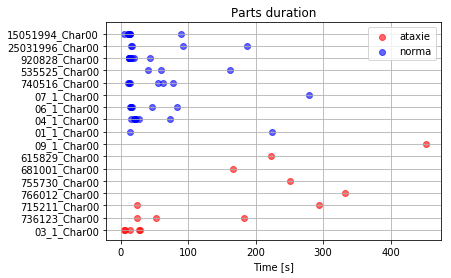

In [12]:
fig, ax = plt.subplots()
for name, group in parts.groupby(by='type'):
    col = [[1, 0, 0]]
    if name == 'norma':
        col = [[0, 0, 1]]
    ax.scatter(group.time_len, group.subjectID, c=col, label=name,alpha=.6)

ax.legend()
ax.grid(True)
ax.set_title('Parts duration')
ax.set_xlabel('Time [s]')
plt.show()

In [13]:
X.to_csv(output_path + 'X.csv',index=False)

In [14]:
parts.to_csv(output_path + 'Parts.csv',index=False)